## Wine Quality Dataset:

### 1. Check the Effect of Normalization using Scatter Plots, Feature Extraction and Distance Metrics

In [10]:
##Imported Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import zscore
import time

In [11]:
#Reading Red and White Wine Datasets
Red_df = pd.read_csv("Red_Data.csv")
White_df = pd.read_csv("White_Data.csv")
# print(Red_df.head())
# print(White_df.head())

#Adding "Color" Column to both dataframes 
White_df["color"] = "0"
Red_df["color"] = "1"


#Combining Both Dataframe
Wine_df = pd.concat([White_df.reset_index(drop=True), Red_df.reset_index(drop=True)], axis=0)
#print(Wine_df)

#Dividing the data into data and classes
Main_Nocolor_Noclass_df = Wine_df.iloc[:,0:11]                  ##Main data for splitting
Data_withclass_df = Wine_df.iloc[:,0:12]
Class_df = Wine_df.iloc[:,11]
Color_df = Wine_df.iloc[:,12]                  ##Label Data for splitting
print('Data:\n', Main_Nocolor_Noclass_df)
print('===============================================================================')
print('Original Data with Class:\n', Data_withclass_df)
print('===============================================================================')
print('Classes Label:\n', Class_df)
print('===============================================================================')
print('Color Label:\n', Color_df)
print('\n')

Data:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur di

#### Z Score Normalization

In [60]:
## Z Score Normalization on whole dataset
Z_data = zscore(Main_Nocolor_Noclass_df)
#print('Normalized Data:\n', Z_data)

Norm_Data_df = pd.DataFrame(Z_data)
Norm_Data_df.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
print('===============================================================================')
print('Normalized Dataframe:\n', Norm_Data_df)


## Normalized Data with color for Pairplot-----------------> Normalized 
Norm_datacolor_df = pd.concat([Norm_Data_df.reset_index(drop=True), Color_df.reset_index(drop=True)], axis = 1)
print('===============================================================================')
print('Normalized Data with Color:\n', Norm_datacolor_df)

Norm_dataclass_df = pd.concat([Norm_Data_df.reset_index(drop=True), Class_df.reset_index(drop=True)], axis = 1)
print('===============================================================================')
print('Normalized Data with Class:\n', Norm_dataclass_df)
print('\n')

Norm_data_cc_df = pd.concat([Norm_Data_df.reset_index(drop=True), Class_df.reset_index(drop=True), Color_df.reset_index(drop=True)], axis = 1)
print('===============================================================================')
print('Normalized Data with Color and Class:\n', Norm_data_cc_df)
print('\n')

## Actual Data with color for Pairplot-------------------> Original
Data_with_color_df = pd.concat([Main_Nocolor_Noclass_df.reset_index(drop=True), Color_df.reset_index(drop=True)], axis=1)
print('Original Data with Color:\n', Data_with_color_df)

# ## We have Data_withclass_df for Pairplot 

Normalized Dataframe:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1         -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2          0.682458         -0.362438     0.559966        0.306208  -0.172244   
3         -0.011808         -0.666161     0.009406        0.642523   0.056126   
4         -0.011808         -0.666161     0.009406        0.642523   0.056126   
...             ...               ...          ...             ...        ...   
6492      -0.783214          1.581387    -1.642273       -0.723758   0.969605   
6493      -1.014636          1.277665    -1.504633       -0.681719   0.170311   
6494      -0.706073          1.034686    -1.298173       -0.660699   0.569958   
6495      -1.014636          1.854738    -1.366993       -0.723758   0.541412   
6496      -0.937495         -0.180205     1.041706       -0.387443   0.313042   

    

#### Un-Normalized Data Pair Plots (With Color):

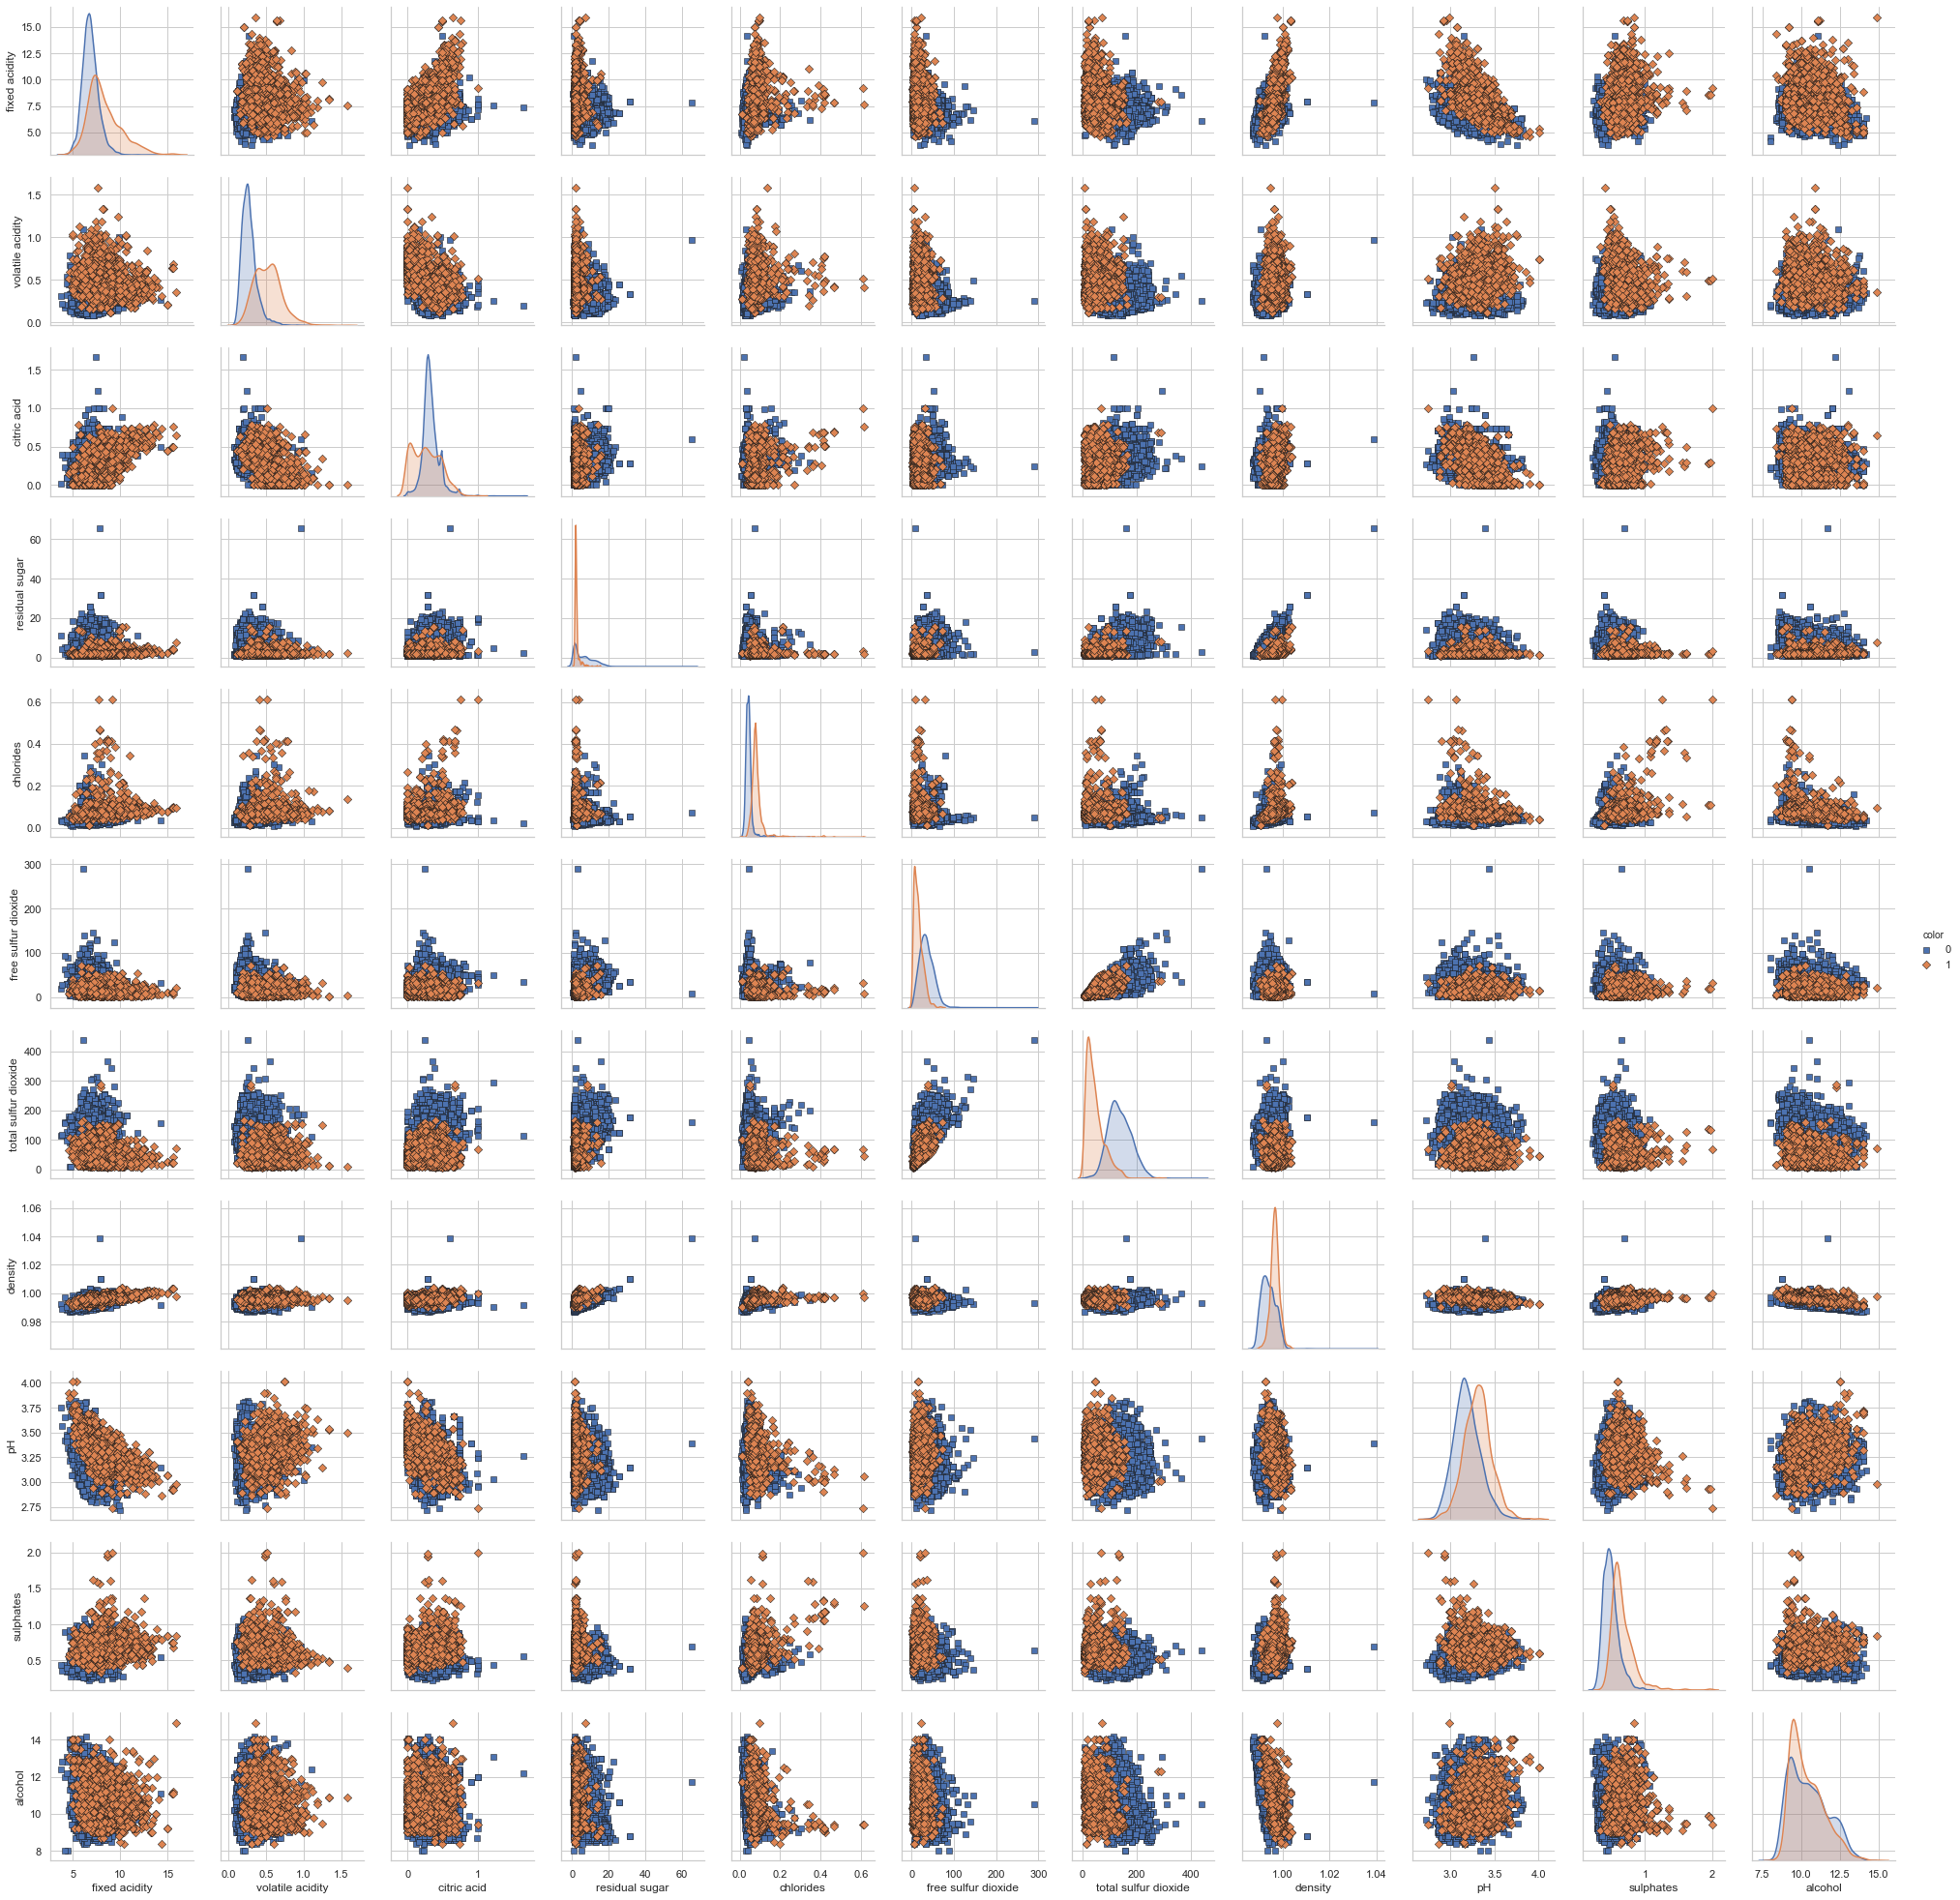

In [58]:
##Pair Plots of Actual Data with Color
sns.set(style='whitegrid', color_codes=True)
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

sns.pairplot(Data_with_color_df, plot_kws=dict(edgecolor='k', linewidth=0.5), diag_kws=dict(shade=True), diag_kind='kde', hue = 'color', markers = ["s", "D"], vars=Wine_df[D])
plt.show()

*{Request to Zoom the pairplots in order to see clearly.}*

#### Normalized Data Pairplot (With Color):

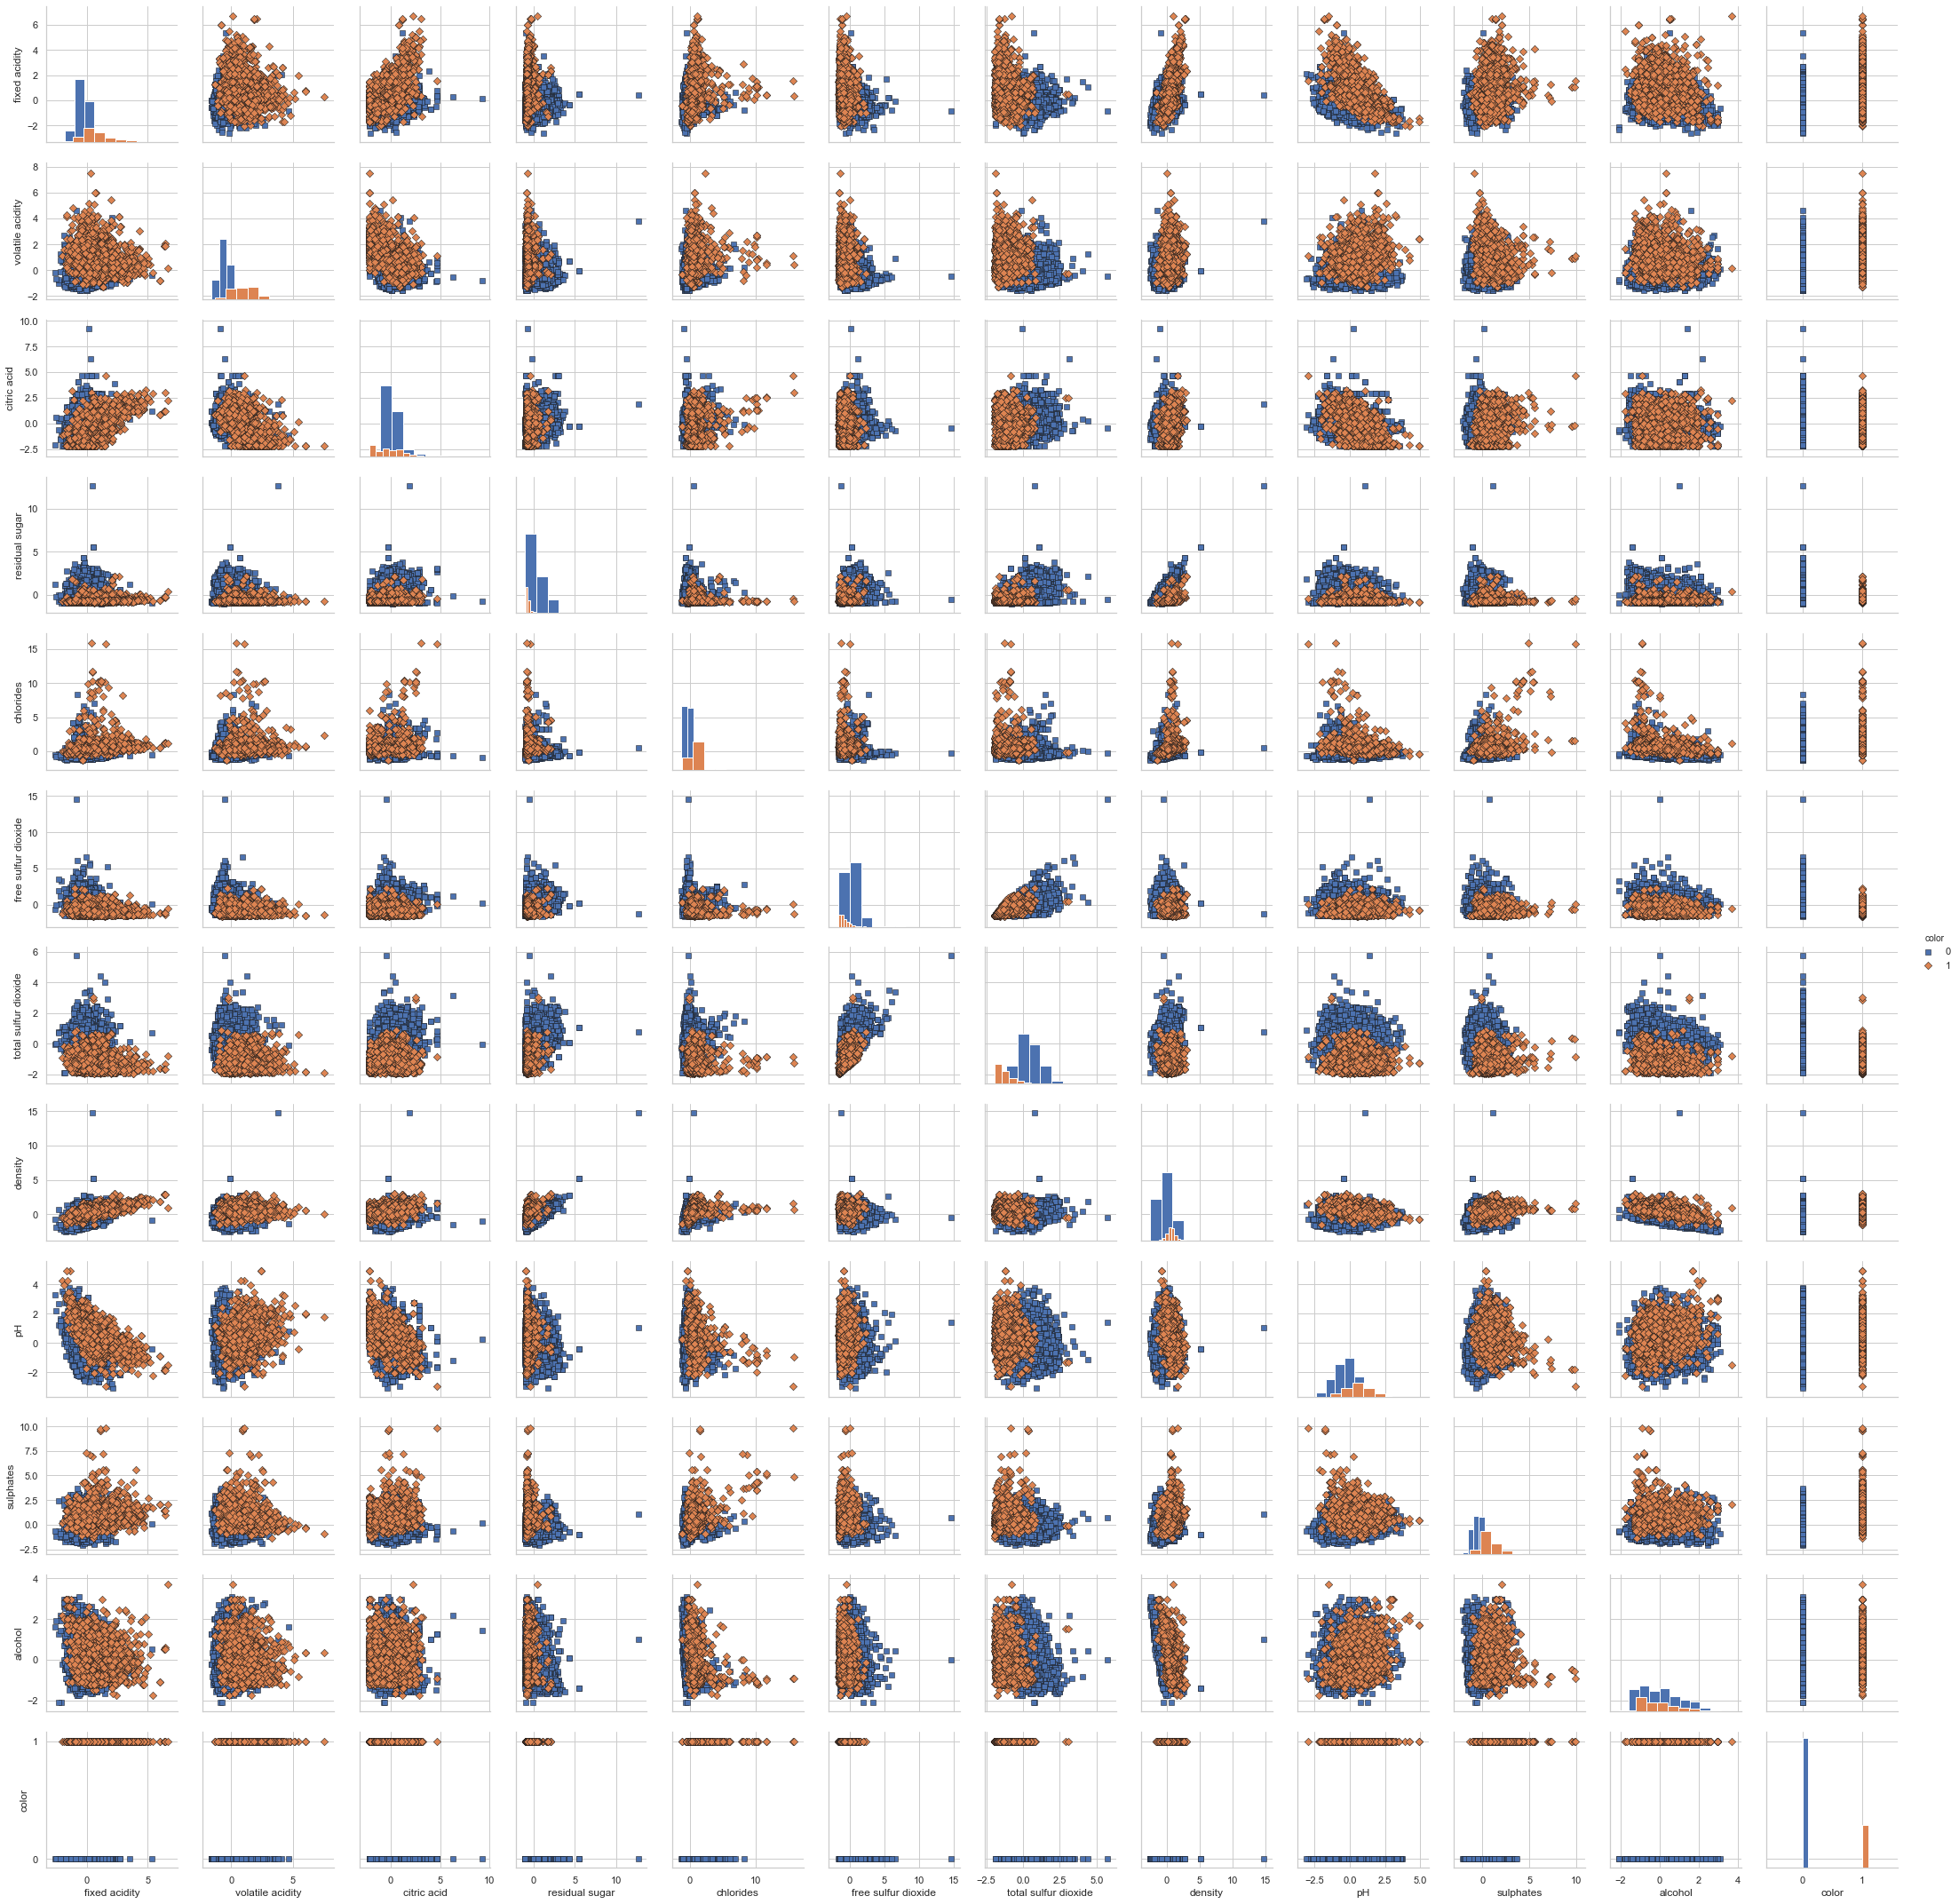

In [59]:
##Pair Plots of Normalized Data with Color
sns.pairplot(Norm_datacolor_df, diag_kind='hist', plot_kws=dict(edgecolor='k', linewidth=0.5), hue = 'color', markers = ["s", "D"])
plt.show()

*{Request to Zoom the pairplots in order to see clearly.}*

#### Density PairPlots of Un-Normalized Data

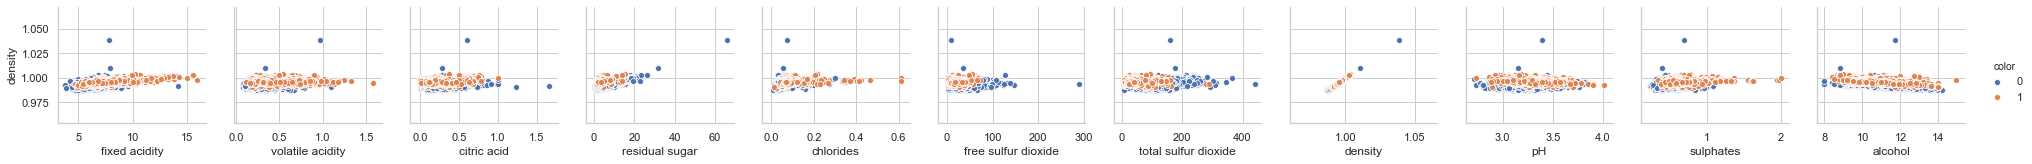

In [14]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
sns.pairplot(Data_with_color_df, hue='color', y_vars = columns[7], x_vars= columns)

#### Density PairPlots of Normalized Data

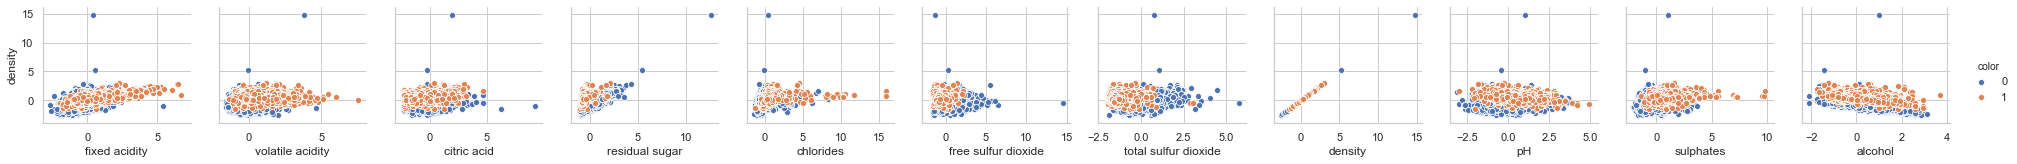

In [15]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
sns.pairplot(Norm_datacolor_df, hue='color', y_vars = columns[7], x_vars= columns)

## Pair Plot Differences (with Normalized Data and Un-normalized Data):

- Since we have plotted 2 scatter plots, one with the original and one with the normalized data, **datapoints in both the scatter plots will have identical representation except the scale on which they are being represented**. (zscore normalization centered the whole data i.e. mean = 0 and standard deviation = 1)

- Density Pairplots seems different however it's just the result of normalization i.e. the clusters of both the classes expanded after normalization.



-------------------------------------------------------------------------------------------------------------------------------

#### Pair Plots with both Color and Quality 

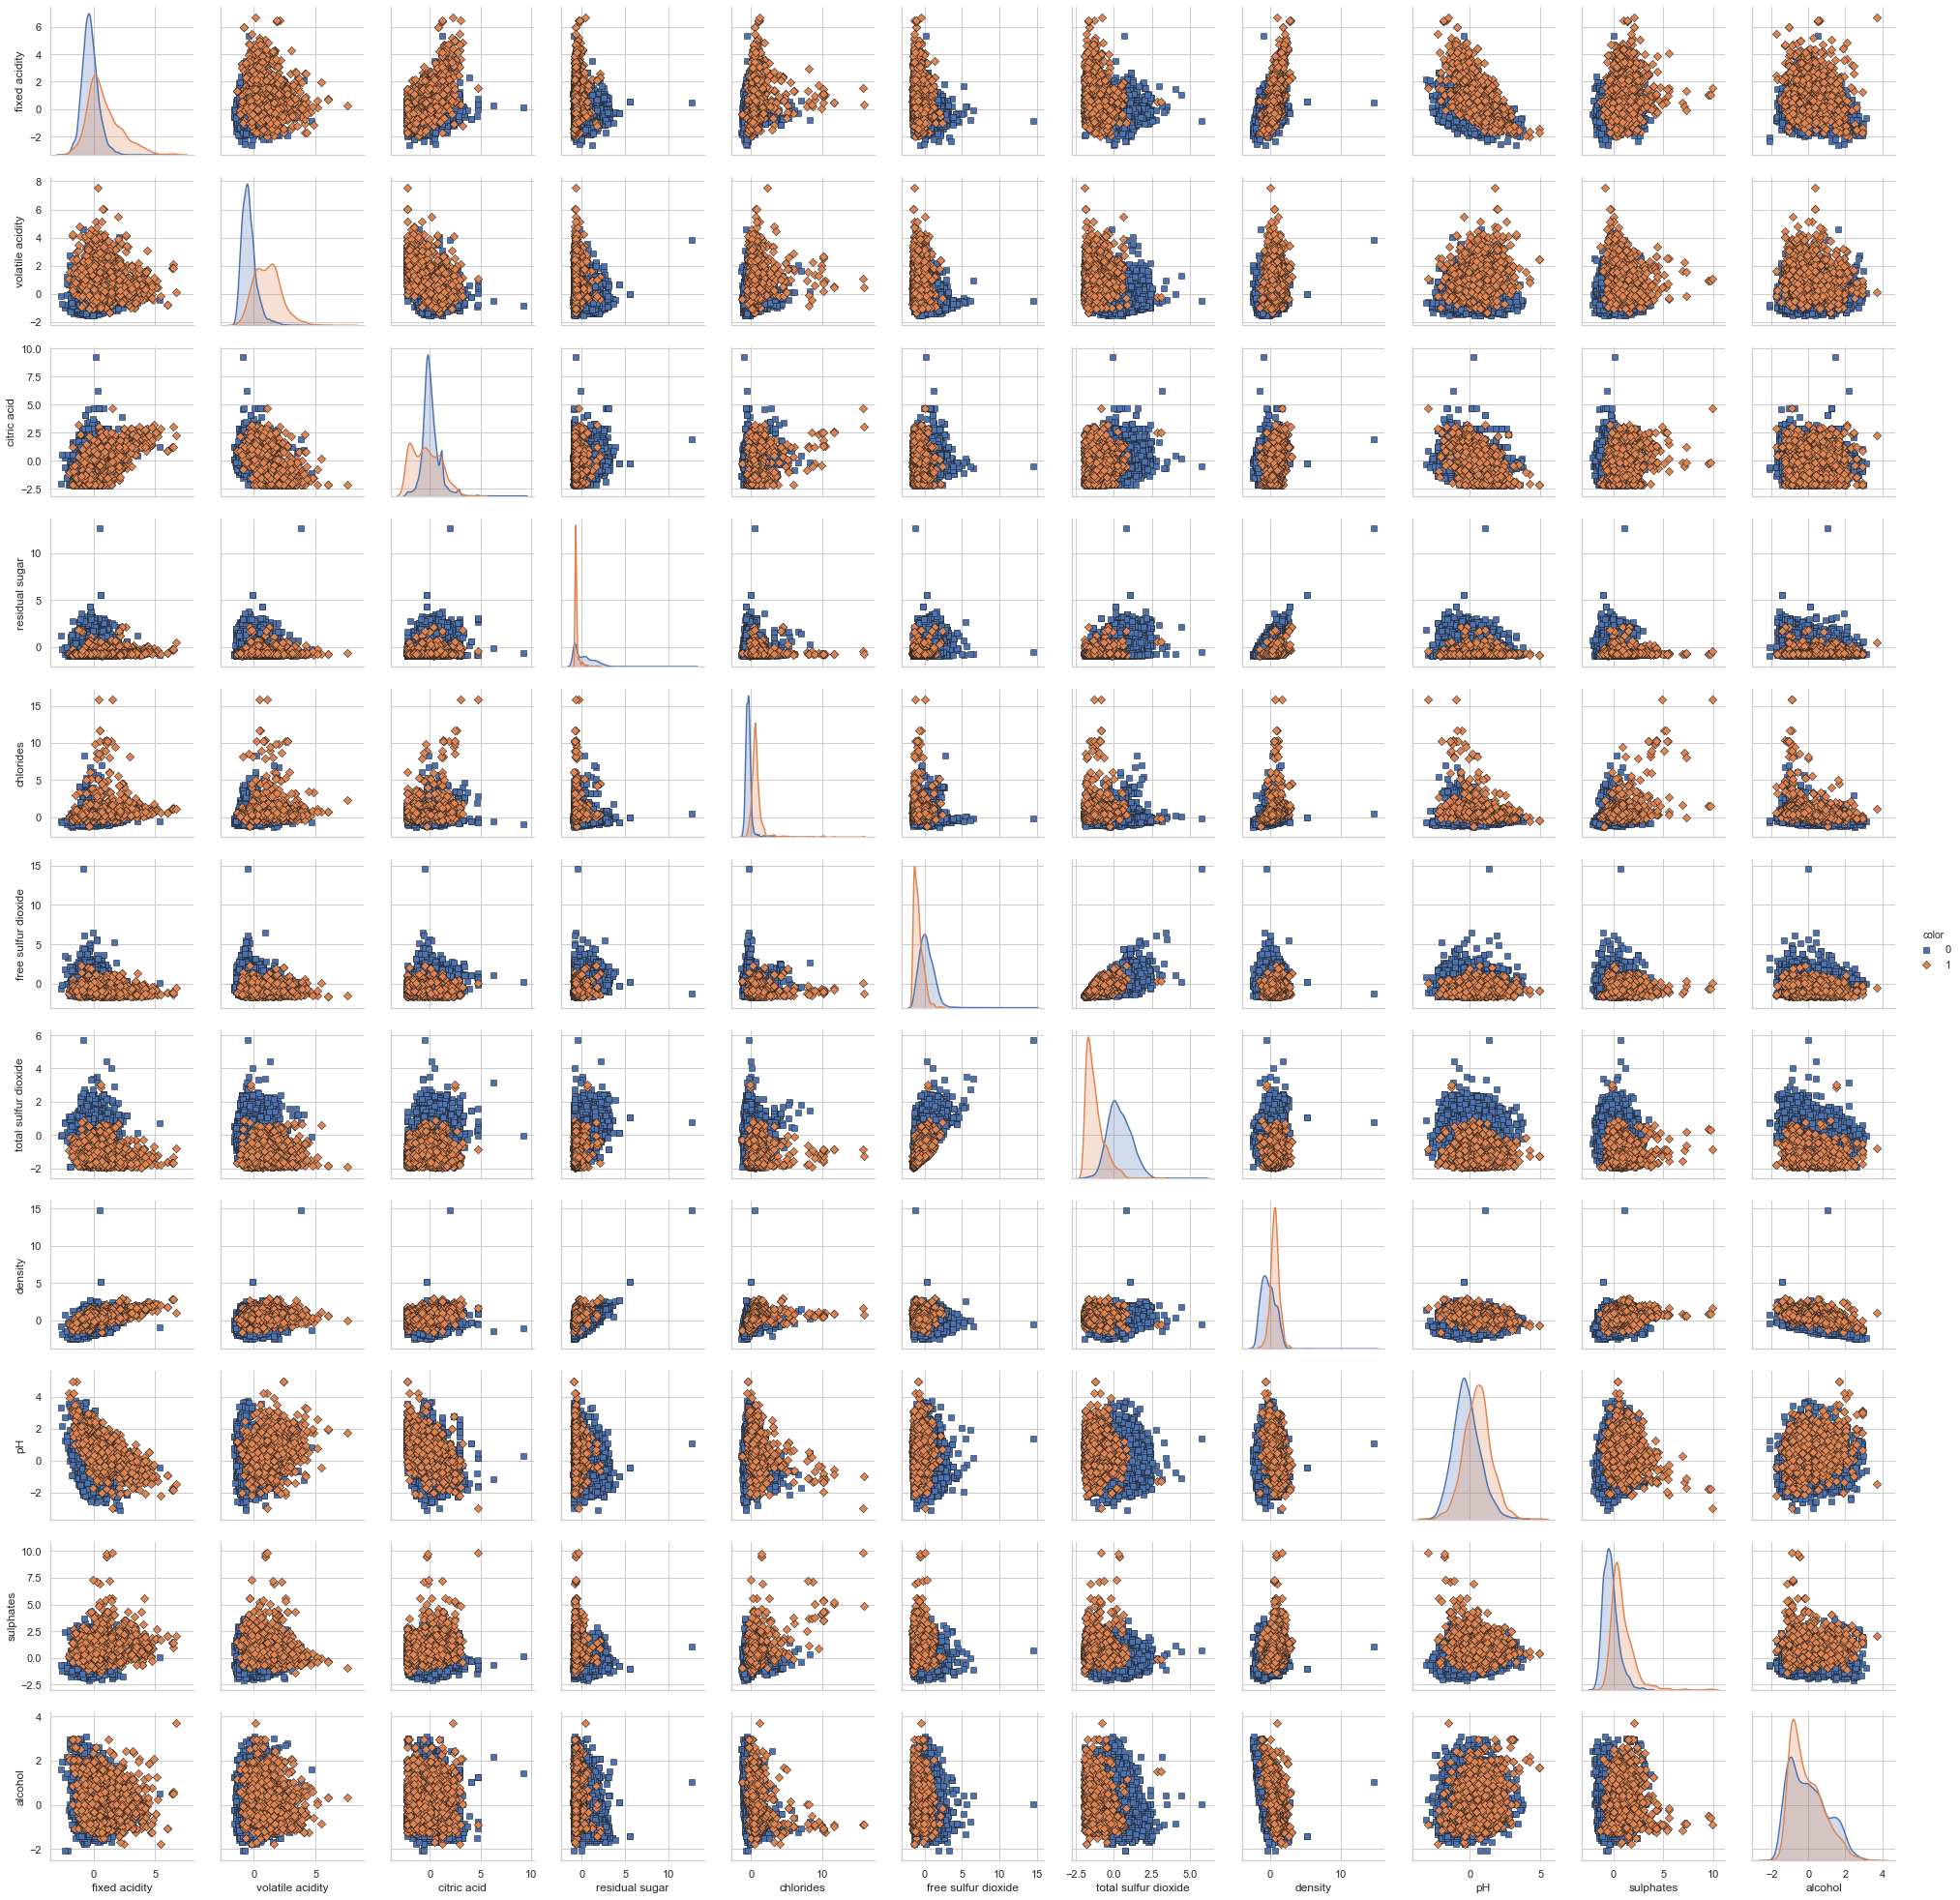

In [43]:
##Pair Plots of Actual Data with Color
sns.set(style='whitegrid', color_codes=True)
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

sns.pairplot(Norm_data_cc_df, plot_kws=dict(edgecolor='k', linewidth=0.5), diag_kws=dict(shade=True), diag_kind='kde', hue = 'color', markers = ["s", "D"], vars=Wine_df[D])
plt.show()

--------------------------------------------------------------------------------------------------------------------------

### 2. Splitting Normalized and Un-Normalized Data into Train and Test Data Set.

In [50]:
##Train_Test Split of Normalized Data
Train_data, Test_data, Train_value, Test_value = train_test_split(Norm_Data_df, np.ravel(Color_df), test_size=0.2, random_state=42)
print('Normalized Training Data:\n', Train_data)
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('Normalized Testing Data:\n', Test_data)
print('\n\n')

##Train_Test Split of Un-Normalized Data (Used in th end of the code for comparison)
Or_Train_data, Or_Test_data, Or_Train_value, Or_Test_value = train_test_split(Main_Nocolor_Noclass_df, np.ravel(Color_df), test_size=0.2, random_state=42)
print('Un-normalized Training Data:\n', Or_Train_data)
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('Un-normalized Testing Data:\n', Or_Test_data)

Normalized Training Data:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1916      -0.474652         -0.544672     0.284686        0.558444  -0.314975   
947        0.991020         -1.091373     0.215866       -0.807837  -0.486252   
877       -0.937495         -0.362438     0.147046       -0.807837   1.797445   
2927      -0.166089         -0.180205    -0.059414        0.768642  -0.571891   
6063       0.991020          0.609474     1.248165       -0.744778   8.934001   
...             ...               ...          ...             ...        ...   
3772      -0.706073         -0.605417    -0.197054        1.735549  -0.600437   
5191      -0.243230          0.123518    -0.472334       -0.639680   1.197975   
5226       4.770910         -0.423183     2.074005       -0.597640   0.741235   
5390       1.299582          0.366496     1.316985       -0.597640  -0.115152   
860        0.682458         -0.423183     0.215866       -0.786818  -0.743168   



--------------------------------------------------------------------------------------------------------------------------

### 3. KNN Classfier with Normalized Data for Uniform, Manhattan and Euclidean Weight Schemes!

In [51]:
# KNN Classifier
K_values=list(range(1,51))
K_df = pd.DataFrame(K_values, columns=['K_value'])
#print(K_df)
#print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## KNN Implementation for Uniform Weight
print('FOR UNIFORM WEIGHTS:')
Start1_Uniform = time.time()
Accuracy_1=[]
for i in K_values:
    Classifier1 = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    Classifier1.fit(Train_data, Train_value)
    C1_pred = Classifier1.predict(Test_data)
    Accuracy1 = accuracy_score(Test_value, C1_pred)
    Accuracy_1.append(Accuracy1*100)

End1_Uniform = (time.time() - Start1_Uniform)
print('Time for Uniform Weights: ', End1_Uniform)
print('\n')
cm1 = confusion_matrix(Test_value, C1_pred)
print('Confusion Matrix:\n', cm1)
print('\n')
#print('Accuracy List with Uniform Weights:\n', Accuracy_1)
#print('\n')
Acc1_df = pd.DataFrame(Accuracy_1, columns=['Accuracy'])
K_Acc1_df = pd.concat([K_df.reset_index(drop=True), Acc1_df.reset_index(drop=True)], axis=1)
#print(K_Acc1_df)

K_Acc1_df = K_Acc1_df.set_index('K_value') 
K_Acc1_df = K_Acc1_df.sort_values(by=['Accuracy'], ascending=False)
print('After Sorting, Highest Accuracy is obtained for:\n\n', K_Acc1_df.head(5))
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

FOR UNIFORM WEIGHTS:
Time for Uniform Weights:  11.27196216583252


Confusion Matrix:
 [[979   7]
 [  7 307]]


After Sorting, Highest Accuracy is obtained for:

           Accuracy
K_value           
3        99.461538
4        99.461538
1        99.384615
2        99.307692
6        99.307692
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### Highest Accuracy with Uniform Weights = 99.46% for k=[3,4]
#### Total Misclassification: 14

In [52]:
## KNN Implementation for Manhattan Distance
print('FOR MANHATTAN:\n')
Start1_Man = time.time()
Accuracy_2=[]
for j in K_values:
    Classifier2 = KNeighborsClassifier(n_neighbors=j, weights='distance', p=1, metric='manhattan')
    Classifier2.fit(Train_data, Train_value)
    C2_pred = Classifier2.predict(Test_data)
    Accuracy2 = accuracy_score(Test_value, C2_pred)
    Accuracy_2.append(Accuracy2*100)

End1_Man = (time.time() - Start1_Man)
print('Time for Manhattan Distance: ', End1_Man)
print('\n')
cm2 = confusion_matrix(Test_value, C2_pred)
print('Confusion Matrix:\n', cm2)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_2)
print('\n\n')
Acc2_df = pd.DataFrame(Accuracy_2, columns=['Accuracy'])
K_Acc2_df = pd.concat([K_df.reset_index(drop=True), Acc2_df.reset_index(drop=True)], axis=1)
print(K_Acc2_df)
print('===============================================================================')

K_Acc2_df = K_Acc2_df.set_index('K_value')
K_Acc2_df = K_Acc2_df.sort_values(by=['Accuracy'], ascending=False)
print('After Sorting, Highest Accuracy is obtained for:\n', K_Acc2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

FOR MANHATTAN:

Time for Manhattan Distance:  9.452008724212646


Confusion Matrix:
 [[983   3]
 [  5 309]]


Accuracy List for Manhattan:
 [99.46153846153845, 99.46153846153845, 99.53846153846155, 99.61538461538461, 99.61538461538461, 99.46153846153845, 99.53846153846155, 99.53846153846155, 99.61538461538461, 99.61538461538461, 99.46153846153845, 99.61538461538461, 99.46153846153845, 99.53846153846155, 99.53846153846155, 99.61538461538461, 99.61538461538461, 99.61538461538461, 99.61538461538461, 99.61538461538461, 99.61538461538461, 99.61538461538461, 99.6923076923077, 99.6923076923077, 99.6923076923077, 99.6923076923077, 99.61538461538461, 99.6923076923077, 99.61538461538461, 99.61538461538461, 99.53846153846155, 99.61538461538461, 99.53846153846155, 99.53846153846155, 99.53846153846155, 99.53846153846155, 99.53846153846155, 99.53846153846155, 99.46153846153845, 99.46153846153845, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.384615

#### Highest Accuracy with Manhattan Weights = 99.69% for k= range(22,28)
#### Total Misclassification: 08

In [20]:
## KNN Implementation for Euclidean Distance
print('FOR EUCLIDEAN:\n')
Start1_Euc = time.time()
Accuracy_3=[]
for k in K_values:
    Classifier3 = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2, metric='euclidean')
    Classifier3.fit(Train_data, Train_value)
    C3_pred = Classifier3.predict(Test_data)
    Accuracy3 = accuracy_score(Test_value, C3_pred)
    Accuracy_3.append(Accuracy3*100)

End1_Euc = (time.time() - Start1_Euc)
print('Time for Euclidean Weights: ', End1_Euc)
cm3 = confusion_matrix(Test_value, C3_pred)
print('Confusion Matrix:\n', cm3)
print('\n')
print('Accuracy List for Euclidean:\n\n', Accuracy_3)
print('\n\n')
Acc3_df = pd.DataFrame(Accuracy_3, columns=['Accuracy'])
K_Acc3_df = pd.concat([K_df.reset_index(drop=True), Acc3_df.reset_index(drop=True)], axis=1)
print(K_Acc3_df)
print('===============================================================================')

K_Acc3_df = K_Acc3_df.set_index('K_value')
K_Acc3_df = K_Acc3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acc3_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

FOR EUCLIDEAN:

Time for Euclidean Weights:  9.059967756271362
Confusion Matrix:
 [[980   6]
 [  7 307]]


Accuracy List for Euclidean:
 [99.38461538461539, 99.38461538461539, 99.53846153846155, 99.53846153846155, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.46153846153845, 99.38461538461539, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.23076923076923, 99.07692307692308, 99.07692307692308, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.07692307692308, 99.15384615384616, 99.07692307692308, 99.15384615384616, 99.07692307692308, 99.15384615384616, 99.15384615384616, 99.15384615384616, 99.07692307692308, 99.0, 99.07692307692308, 99.0, 99.07692307692308, 99.0, 99.0, 99.0, 99.076923076923

#### Highest Accuracy with Euclidean Weights = 99.53% for k=[3,4]
#### Total Misclassification: 13

## KNN Classifier Performance Analysis (For Uniform/Manhattan/Euclidean Weight Schemes):
- As per confusion matrix of all the 3 schemes, **Manhattan** distance based weight scheme has only 3 misclassification for class 0 and 5 misclassification for class 1 which is lowest and less as compared to Uniform (14 misclassification) and Euclidean distance (13 misclassification) based weight. Same has proved by accuracy score i.e. Manhattan is giving highest accuracy of 99.69 %.

- **Manhattan** Weight Scheme is taking lowest time among all three schemes.

#### K plot for Uniform, Manhattan and Euclidean Distances before PCA and LDA

All Schemes Dataframe:
       Uniform  Manhattan  Euclidean
0   99.384615  99.461538  99.384615
1   99.307692  99.461538  99.384615
2   99.461538  99.538462  99.538462
3   99.461538  99.615385  99.538462
4   99.153846  99.615385  99.384615
5   99.307692  99.461538  99.384615
6   99.230769  99.538462  99.384615
7   99.230769  99.538462  99.384615
8   99.230769  99.615385  99.384615
9   99.153846  99.615385  99.461538
10  99.153846  99.461538  99.384615
11  99.076923  99.615385  99.230769
12  99.076923  99.461538  99.230769
13  99.076923  99.538462  99.230769
14  99.076923  99.538462  99.230769
15  99.076923  99.615385  99.153846
16  99.076923  99.615385  99.153846
17  99.000000  99.615385  99.153846
18  99.000000  99.615385  99.230769
19  99.000000  99.615385  99.076923
20  99.000000  99.615385  99.076923
21  99.076923  99.615385  99.153846
22  99.076923  99.692308  99.153846
23  99.076923  99.692308  99.153846
24  99.076923  99.692308  99.153846
25  99.076923  99.692308  99.153846
26  

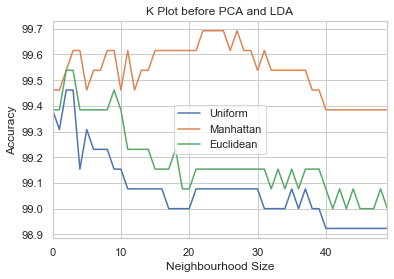

In [21]:
## K plot for Uniform, Manhattan and Euclidean Distances before PCA and LDA
Combined1_df = pd.concat([Acc1_df.reset_index(drop=True), Acc2_df.reset_index(drop=True), Acc3_df.reset_index(drop=True)], axis =1)
Combined1_df.columns = ['Uniform', 'Manhattan', 'Euclidean']
print('All Schemes Dataframe:\n', Combined1_df)

Combined1_df[:].plot.line()
plt.xlabel('Neighbourhood Size')
plt.ylabel('Accuracy')
plt.title('K Plot before PCA and LDA')
plt.show()

#### K Plot Observation:
- Maximum Accuracy is obtained for following range of K:
   - For Uniform, K = [3,4]
   - For Manhattan, K = [22,28]
   - For Euclidean, K = [3,4]

---------------------------------------------------------------------------------------------------------------------------

### 4. PCA Implementation and its effect on KNN

In [22]:
#Fit Training data on PCA snd transform the Test data
print('AFTER PERFORMING PCA ON TEST DATA AND TRANSFORM TEST DATA')
est_pca = PCA(n_components = 5, random_state=42)
PCA_Train_data = est_pca.fit_transform(Train_data)
PCA_Test_data = est_pca.transform(Test_data)
print('PCA Tranformed Training Data:\n', PCA_Train_data)
print('\n')
print('PCA Tranformed Testing Data:\n', PCA_Test_data)
print('===============================================================================')

AFTER PERFORMING PCA ON TEST DATA AND TRANSFORM TEST DATA
PCA Tranformed Training Data:
 [[ 2.29564773  0.79962079 -0.2548415  -0.19323861 -0.63096559]
 [ 0.93997263 -0.14920557  1.66072149 -1.32729113 -0.72078624]
 [-0.02236283 -0.64746331 -0.02593355 -0.01443509 -1.9146076 ]
 ...
 [-2.71263644  3.39801087  3.59979023 -0.35123628  1.23271117]
 [-2.77749686 -0.38764049  2.09708796  1.63852039  1.68851626]
 [-0.12132477 -0.51041537  0.82900313  0.58837512  0.04917977]]


PCA Tranformed Testing Data:
 [[ 0.60704008 -1.58794431  1.35289124  0.41615496 -0.38287444]
 [ 0.9565253  -0.70163893  3.0204978   0.00919036 -0.07255398]
 [ 2.08648793  0.49279567 -0.63788646 -0.79555802  0.15974666]
 ...
 [-4.05543186  4.27144878  1.46145751  3.2746986  -4.65910262]
 [-2.44954461 -0.01205696 -1.52655005 -0.30151932 -0.08463457]
 [-2.86591237  0.58857818 -1.60199546  0.55979273  0.77786948]]


#### After PCA: KNN Classfier with normalized data for Uniform, Manhattan and Euclidean Weight Schemes!

In [24]:
## 1) for Uniform Weight

# K_values=list(range(1,50))
# K_df = pd.DataFrame(K_values, columns=['K_value'])
print('AFTER PCA\nFOR UNIFORM WEIGHTS:\n')
Start2_Uniform = time.time()
Accuracy_test1=[]    
for m in K_values:
    Classifier1_test = KNeighborsClassifier(n_neighbors=m, weights='uniform')
    Classifier1_test.fit(PCA_Train_data, Train_value)
    C1test_pred = Classifier1_test.predict(PCA_Test_data)
    testAccuracy1 = accuracy_score(Test_value, C1test_pred)
    Accuracy_test1.append(testAccuracy1*100)

End2_Uniform = (time.time() - Start2_Uniform)
print('Time for Uniform Weights: ', End2_Uniform)
cm4 = confusion_matrix(Test_value, C1test_pred)
print('Confusion Matrix:\n', cm4)
print('\n')
print('Accuracy List with Uniform Weights:\n', Accuracy_test1)
print('\n\n')
Acc_test1_df = pd.DataFrame(Accuracy_test1, columns=['Accuracy'])
K_Acctest1_df = pd.concat([K_df.reset_index(drop=True), Acc_test1_df.reset_index(drop=True)], axis=1)
print(K_Acctest1_df)
print('===============================================================================')

K_Acctest1_df = K_Acctest1_df.set_index('K_value')
K_Acctest1_df = K_Acctest1_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Uniform Weights\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest1_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

AFTER PCA
FOR UNIFORM WEIGHTS:

Time for Uniform Weights:  5.1319615840911865
Confusion Matrix:
 [[980   6]
 [ 11 303]]


Accuracy List with Uniform Weights:
 [99.15384615384616, 98.46153846153847, 98.46153846153847, 98.38461538461539, 98.23076923076923, 98.38461538461539, 98.38461538461539, 98.46153846153847, 98.53846153846155, 98.38461538461539, 98.61538461538461, 98.53846153846155, 98.6923076923077, 98.61538461538461, 98.61538461538461, 98.46153846153847, 98.53846153846155, 98.53846153846155, 98.53846153846155, 98.61538461538461, 98.61538461538461, 98.61538461538461, 98.61538461538461, 98.53846153846155, 98.6923076923077, 98.53846153846155, 98.61538461538461, 98.61538461538461, 98.61538461538461, 98.61538461538461, 98.61538461538461, 98.6923076923077, 98.6923076923077, 98.76923076923076, 98.6923076923077, 98.76923076923076, 98.76923076923076, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.76923076923076, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.846153

#### Highest Accuracy with Uniform Weights = 98.84%
#### Total Misclassification: 17

In [53]:
## 2) for Manhattan Distance
print('AFTER PCA\nFOR MANHATTAN:\n')
Start2_Man = time.time()
Accuracy_test2=[]
for n in K_values:
    Classifier2_test = KNeighborsClassifier(n_neighbors=n, weights='distance', p=1, metric='manhattan')
    Classifier2_test.fit(PCA_Train_data, Train_value)
    C2test_pred = Classifier2_test.predict(PCA_Test_data)
    testAccuracy2 = accuracy_score(Test_value, C2test_pred)
    Accuracy_test2.append(testAccuracy2*100)

End2_Man = (time.time() - Start2_Man)
print('Time for Manhattan Weights: ', End2_Man)
cm5 = confusion_matrix(Test_value, C2test_pred)
print('Confusion Matrix:\n', cm5)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_test2)
print('\n\n')
Acc_test2_df = pd.DataFrame(Accuracy_test2, columns=['Accuracy'])
K_Acctest2_df = pd.concat([K_df.reset_index(drop=True), Acc_test2_df.reset_index(drop=True)], axis=1)
print(K_Acctest2_df)
print('===============================================================================')

K_Acctest2_df = K_Acctest2_df.set_index('K_value')
K_Acctest2_df = K_Acctest2_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Manhattan Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


AFTER PCA
FOR MANHATTAN:

Time for Manhattan Weights:  2.7960078716278076
Confusion Matrix:
 [[980   6]
 [  8 306]]


Accuracy List for Manhattan:
 [99.0, 99.0, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.92307692307692, 98.84615384615385, 98.92307692307692, 99.07692307692308, 99.0, 99.07692307692308, 99.07692307692308, 98.92307692307692, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.76923076923076, 98.76923076923076, 98.76923076923076, 98.76923076923076, 98.76923076923076, 98.76923076923076, 98.76923076923076, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.8461538461538

#### Highest Accuracy with Manhattan Weights = 99.07% for k=[9,12,11]
#### Total Misclassification: 14

In [54]:
## 3) for Euclidean Distance
print('AFTER PCA\nFOR EUCLIDEAN:\n')
Start2_Euc = time.time() 
Accuracy_test3=[]
for b in K_values:
    Classifier3_test = KNeighborsClassifier(n_neighbors=b, weights='distance', p=2, metric='euclidean')
    Classifier3_test.fit(PCA_Train_data, Train_value)
    C3test_pred = Classifier3_test.predict(PCA_Test_data)
    testAccuracy3 = accuracy_score(Test_value, C3test_pred)
    Accuracy_test3.append(testAccuracy3*100)

End2_Euc =(time.time() - Start2_Euc)
print('Time for Euclidean Weights: ', End2_Euc)
cm6 = confusion_matrix(Test_value, C3test_pred)
print('Confusion Matrix:\n', cm6)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_test3)
print('\n\n')
Acc_test3_df = pd.DataFrame(Accuracy_test3, columns=['Accuracy'])
K_Acctest3_df = pd.concat([K_df.reset_index(drop=True), Acc_test3_df.reset_index(drop=True)], axis=1)
print(K_Acctest3_df)
print('===============================================================================')

K_Acctest3_df = K_Acctest3_df.set_index('K_value')
K_Acctest3_df = K_Acctest3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest3_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


AFTER PCA
FOR EUCLIDEAN:

Time for Euclidean Weights:  2.9479997158050537
Confusion Matrix:
 [[980   6]
 [  8 306]]


Accuracy List for Manhattan:
 [99.15384615384616, 99.15384615384616, 98.84615384615385, 99.07692307692308, 98.6923076923077, 98.6923076923077, 98.76923076923076, 98.92307692307692, 98.92307692307692, 98.92307692307692, 99.0, 99.0, 98.92307692307692, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.76923076923076, 98.6923076923077, 98.84615384615385, 98.84615384615385, 98.76923076923076, 98.84615384615385, 98.76923076923076, 98.76923076923076, 98.76923076923076, 98.84615384615385, 98.76923076923076, 98.84615384615385, 98.84615384615385, 98.76923076923076, 98.84615384615385, 98.92307692307692, 98.92307692307692, 98.92307692307692, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.84615384615385, 98.92307692307692, 98.923

#### Highest Accuracy with Euclidean Weights = 99.15% for k=[1,2], however k=1 is the case of Overfitting.
#### Total Misclassification: 14

## After PCA: KNN Classifier Performance Analysis (For Uniform/Manhattan/Euclidean Weight Schemes):
- Highest Acccuracy of 99.15% is achieved for Euclidean distance weight scheme, whereas Manhattan and Uniform weight scheme has achieved 99.07% and 98.84% accuracy respectively.

- As per confusion matrices, **manhattan and euclidean** weight scheme has only 6 misclassification for class 0 and 8 misclassification for class 1 i.e. **14 misclassification** in total, whereas **uniform** weight scheme has 17 miclassification.

- Manhattan distance scheme is taking lowest execution time among all three schemes, euclidean weight scheme is taking abit longer time and highest time by Uniform weight scheme.

I would choose **Euclidean with k=2 as best criteria (since k =1 would cause Overfitting)** scheme because it has minimum misclassification error and highest accuracy among all three schemes at the cost of a bit higher execution time than manhattan.

#### After PCA: K plot for Uniform, Manhattan and Euclidean Distances

All Schemes Dataframe:
       Uniform  Manhattan  Euclidean
0   99.153846  99.000000  99.153846
1   98.461538  99.000000  99.153846
2   98.461538  98.846154  98.846154
3   98.384615  98.846154  99.076923
4   98.230769  98.846154  98.692308
5   98.384615  98.923077  98.692308
6   98.384615  98.846154  98.769231
7   98.461538  98.923077  98.923077
8   98.538462  99.076923  98.923077
9   98.384615  99.000000  98.923077
10  98.615385  99.076923  99.000000
11  98.538462  99.076923  99.000000
12  98.692308  98.923077  98.923077
13  98.615385  98.846154  98.846154
14  98.615385  98.846154  98.846154
15  98.461538  98.846154  98.846154
16  98.538462  98.846154  98.846154
17  98.538462  98.769231  98.769231
18  98.538462  98.769231  98.692308
19  98.615385  98.769231  98.846154
20  98.615385  98.769231  98.846154
21  98.615385  98.769231  98.769231
22  98.615385  98.769231  98.846154
23  98.538462  98.769231  98.769231
24  98.692308  98.846154  98.769231
25  98.538462  98.846154  98.769231
26  

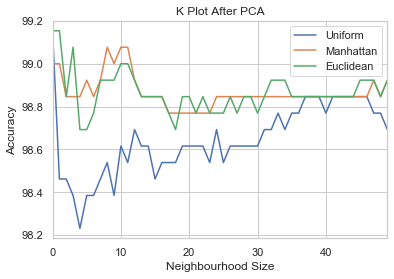

In [27]:
## Plot Line plot for Uniform, Manhattan and Euclidean Distances after PCA
Combined2_df = pd.concat([Acc_test1_df.reset_index(drop=True), Acc_test2_df.reset_index(drop=True), Acc_test3_df.reset_index(drop=True)], axis =1)
Combined2_df.columns = ['Uniform', 'Manhattan', 'Euclidean']
print('All Schemes Dataframe:\n', Combined2_df)

Combined2_df[:].plot.line()
plt.xlabel('Neighbourhood Size')
plt.ylabel('Accuracy')
plt.title('K Plot After PCA')
plt.show()

#### K Plot Observation:
- Maximum Accuracy is obtained for following range of K:
   - For Uniform, K = [38,47]
   - For Manhattan, K = [9,11,12]
   - For Euclidean, K = [2]
  

### 5.  LDA Implementation and its effect on KNN

In [28]:
# Fit Training data on LDA snd transform the Test data

print('AFTER PERFORMING LDA ON TEST DATA AND TRANSFORM TEST DATA')
est_lda = LinearDiscriminantAnalysis()
LDA_Train_data = est_lda.fit_transform(Train_data, Train_value)
LDA_Test_data = est_lda.transform(Test_data)
print('LDA Transformed Training Data:\n', LDA_Train_data)
print('LDA Transformed Testing Data:\n', LDA_Test_data)
print('===============================================================================')

AFTER PERFORMING LDA ON TEST DATA AND TRANSFORM TEST DATA
LDA Transformed Training Data:
 [[-1.98107646]
 [-1.88534429]
 [-0.54574636]
 ...
 [ 4.685012  ]
 [ 4.7336336 ]
 [-0.8051647 ]]
LDA Transformed Testing Data:
 [[-1.6286457 ]
 [-2.17666703]
 [-1.93784767]
 ...
 [ 4.92508932]
 [ 4.77368134]
 [ 5.00016157]]


#### After LDA: KNN Classifer with Uniform, Manhattan and Euclidean weights

In [30]:
## 1) for Uniform Weight
# K_values=list(range(1,50))
# K_df = pd.DataFrame(K_values, columns=['K_value'])
Start3_Uniform = time.time()
LDA_Accuracy_test1=[]    
for q in K_values:
    LDA_Classifier1_test = KNeighborsClassifier(n_neighbors=q, weights='uniform')
    LDA_Classifier1_test.fit(LDA_Train_data, Train_value)
    LDA_C1test_pred = LDA_Classifier1_test.predict(LDA_Test_data)
    LDA_testAccuracy1 = accuracy_score(Test_value, LDA_C1test_pred)
    LDA_Accuracy_test1.append(LDA_testAccuracy1*100)

End3_Uniform  = time.time() - Start3_Uniform
print('Time for Uniform Weights: ', End3_Uniform)
cm7 = confusion_matrix(Test_value, LDA_C1test_pred)
print('Confusion Matrix:\n', cm7)
print('\n')
print('Accuracy List with Uniform Weights:\n', LDA_Accuracy_test1)
print('\n\n')
LDA_Acc_test1_df = pd.DataFrame(LDA_Accuracy_test1, columns=['Accuracy'])
LDA_K_Acctest1_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test1_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest1_df)
print('===============================================================================')

LDA_K_Acctest1_df = LDA_K_Acctest1_df.set_index('K_value')
LDA_K_Acctest1_df = LDA_K_Acctest1_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Uniform Weights\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest1_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Time for Uniform Weights:  3.1839637756347656
Confusion Matrix:
 [[982   4]
 [  4 310]]


Accuracy List with Uniform Weights:
 [99.23076923076923, 99.3076923076923, 99.23076923076923, 99.23076923076923, 99.38461538461539, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.46153846153845, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539,

#### Highest Accuracy with Uniform Weights = 99.46% for k= range(6,18)
#### Total Misclassification: 08

In [31]:
## 2) for Manhattan Distance
print('AFTER LDA\nFOR MANHATTAN:\n')
Start3_Man = time.time()
LDA_Accuracy_test2=[]
for w in K_values:
    LDA_Classifier2_test = KNeighborsClassifier(n_neighbors=w, weights='distance', p=1, metric='manhattan')
    LDA_Classifier2_test.fit(LDA_Train_data, Train_value)
    LDA_C2test_pred = LDA_Classifier2_test.predict(LDA_Test_data)
    LDA_testAccuracy2 = accuracy_score(Test_value, LDA_C2test_pred)
    LDA_Accuracy_test2.append(LDA_testAccuracy2*100)

End3_Man = (time.time() - Start3_Man)
print('Time for Manhattan Weights: ', End3_Man)
cm8 = confusion_matrix(Test_value, LDA_C2test_pred)
print('Confusion Matrix:\n', cm8)
print('\n')
print('Accuracy List for Manhattan:\n', LDA_Accuracy_test2)
print('\n\n')
LDA_Acc_test2_df = pd.DataFrame(LDA_Accuracy_test2, columns=['Accuracy'])
LDA_K_Acctest2_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test2_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest2_df)
print('===============================================================================')

LDA_K_Acctest2_df = LDA_K_Acctest2_df.set_index('K_value')
LDA_K_Acctest2_df = LDA_K_Acctest2_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Manhattan Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

AFTER LDA
FOR MANHATTAN:

Time for Manhattan Weights:  0.9200348854064941
Confusion Matrix:
 [[984   2]
 [  7 307]]


Accuracy List for Manhattan:
 [99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.307692307

#### Highest Accuracy with Manhattan Weights = 99.30% for k= range(30,50)
#### Total Misclassification: 09

In [32]:
## 3) for Euclidean Distance
print('AFTER LDA\nFOR EUCLIDEAN:\n')
Start3_Euc = time.time()
LDA_Accuracy_test3=[]
for e in K_values:
    LDA_Classifier3_test = KNeighborsClassifier(n_neighbors=e, weights='distance', p=2, metric='euclidean')
    LDA_Classifier3_test.fit(LDA_Train_data, Train_value)
    LDA_C3test_pred = LDA_Classifier3_test.predict(LDA_Test_data)
    LDA_testAccuracy3 = accuracy_score(Test_value, LDA_C3test_pred)
    LDA_Accuracy_test3.append(LDA_testAccuracy3*100)

End3_Euc = (time.time() - Start3_Euc)
print('Time for Euclidean Weights: ', End3_Euc)
cm9 = confusion_matrix(Test_value, LDA_C3test_pred)
print('Confusion Matrix:\n', cm9)
print('\n')
print('Accuracy List for Euclidean:\n', LDA_Accuracy_test3)
print('\n\n')
LDA_Acc_test3_df = pd.DataFrame(LDA_Accuracy_test3, columns=['Accuracy'])
LDA_K_Acctest3_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test3_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest3_df)
print('===============================================================================')

LDA_K_Acctest3_df = LDA_K_Acctest3_df.set_index('K_value')
LDA_K_Acctest3_df = LDA_K_Acctest3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest3_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

AFTER LDA
FOR EUCLIDEAN:

Time for Euclidean Weights:  0.941892147064209
Confusion Matrix:
 [[984   2]
 [  7 307]]


Accuracy List for Euclidean:
 [99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.23076923076923, 99.23076923076923, 99.23076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076923, 99.3076923076

#### Highest Accuracy with Euclidean Weights = 99.30% for k=range(30,50)
#### Total Misclassification: 09

## After LDA: KNN Classifier Performance Analysis (For Uniform/Manhattan/Euclidean Weight Schemes):
- **Highest Acccuracy of 99.46% is achieved for Uniform distance weight scheme**, whereas Manhattan and Uniform weight scheme has achieved 99.30% accuracy.

- As per confusion matrices, **Uniform** weight scheme has only 4 misclassification for class 0 and 4 misclassification for class 1 i.e. **08 misclassification** in total, whereas **Euclidean and Manhattan has 09 misclassification of data points** in total.

- Manhattan and Euclidean distance scheme is taking the lowest execution time whereas Uniform Weight scheme is taking a bit longer time.

I would choose **Uniform Distance Weight Scheme as best criteria** because it has highest accuracy and minimum misclassification error even though it is taking longer than other two schemes.

#### K plot for Uniform, Manhattan and Euclidean Distances after LDA

All Schemes Dataframe:
       Uniform  Manhattan  Euclidean
0   99.230769  99.230769  99.230769
1   99.307692  99.230769  99.230769
2   99.230769  99.230769  99.230769
3   99.230769  99.230769  99.230769
4   99.384615  99.230769  99.230769
5   99.461538  99.230769  99.230769
6   99.461538  99.230769  99.230769
7   99.461538  99.230769  99.230769
8   99.461538  99.230769  99.230769
9   99.461538  99.230769  99.230769
10  99.461538  99.230769  99.230769
11  99.461538  99.230769  99.230769
12  99.461538  99.230769  99.230769
13  99.461538  99.230769  99.230769
14  99.461538  99.230769  99.230769
15  99.461538  99.230769  99.230769
16  99.461538  99.230769  99.230769
17  99.461538  99.230769  99.230769
18  99.384615  99.230769  99.230769
19  99.384615  99.230769  99.230769
20  99.384615  99.230769  99.230769
21  99.461538  99.230769  99.230769
22  99.384615  99.230769  99.230769
23  99.384615  99.230769  99.230769
24  99.384615  99.230769  99.230769
25  99.384615  99.230769  99.230769
26  

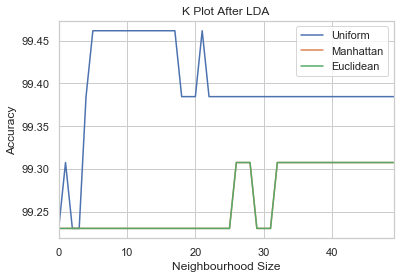

In [33]:
## Plot Line plot for Uniform, Manhattan and Euclidean Distances after LDA
Combined3_df = pd.concat([LDA_Acc_test1_df.reset_index(drop=True), LDA_Acc_test2_df.reset_index(drop=True), LDA_Acc_test3_df.reset_index(drop=True)], axis =1)
Combined3_df.columns = ['Uniform', 'Manhattan', 'Euclidean']
print('All Schemes Dataframe:\n', Combined3_df)

Combined3_df[:].plot.line()
plt.xlabel('Neighbourhood Size')
plt.ylabel('Accuracy')
plt.title('K Plot After LDA')
plt.show()

#### K Plot Observation:
- Maximum Accuracy is obtained for following range of K:
   - For Uniform, K = [6,18]
   - Manhattan and Euclidean Scheme: Accuracy list is exactly same (overlapped in above figure) for K =[27,28,29,33-50]
  
  
  ------------------------------------------------------------------------------------------------------------------------

### 6. PCA Analysis with only first 2 PCA Component Projected Data

In [35]:
## PCA on Whole Dataset
PCA_classifier = PCA(n_components=2, random_state=42)
PC1_PC2_Data = PCA_classifier.fit_transform(Norm_Data_df)
PC1_PC2_df = pd.DataFrame(PC1_PC2_Data, columns=['PC1', 'PC2'])
print('PCA Transformed Dataset:\n', PC1_PC2_Data)
print('\n')

# A) Concatenate with Quality

PC1_PC2_Quality_df = pd.concat([PC1_PC2_df.reset_index(drop=True), Class_df.reset_index(drop=True)], axis=1)    
print('PCA Transformed Dataset with Quality:\n', PC1_PC2_Quality_df)
print('\n')

# B) Concatenate with Color

PC1_PC2_Color_df = pd.concat([PC1_PC2_df.reset_index(drop=True), Color_df.reset_index(drop=True)], axis=1)
print('PCA Transformed Dataset with Color:\n', PC1_PC2_Color_df)

PCA Transformed Dataset:
 [[ 2.77861838  3.04233034]
 [-0.12979316 -0.49168276]
 [ 0.19473808  0.37875436]
 ...
 [-2.27481048 -0.42371133]
 [-2.47956601 -0.39277893]
 [-1.25870118 -0.38337326]]


PCA Transformed Dataset with Quality:
            PC1       PC2  quality
0     2.778618  3.042330        6
1    -0.129793 -0.491683        6
2     0.194738  0.378754        6
3     1.807306  0.589593        6
4     1.807306  0.589593        6
...        ...       ...      ...
6492 -2.194947 -0.541709        5
6493 -2.043117 -0.895009        6
6494 -2.274810 -0.423711        6
6495 -2.479566 -0.392779        5
6496 -1.258701 -0.383373        6

[6497 rows x 3 columns]


PCA Transformed Dataset with Color:
            PC1       PC2 color
0     2.778618  3.042330     0
1    -0.129793 -0.491683     0
2     0.194738  0.378754     0
3     1.807306  0.589593     0
4     1.807306  0.589593     0
...        ...       ...   ...
6492 -2.194947 -0.541709     1
6493 -2.043117 -0.895009     1
6494 -2.274810

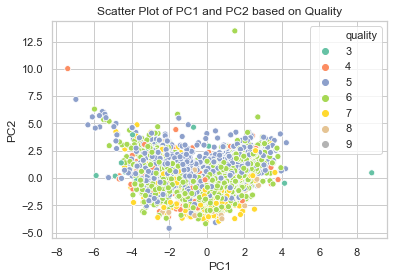

In [36]:
## Scatter Plot of first two components of PCA Projected Data with Quality
sns.set(style='whitegrid', color_codes=True)
sns.scatterplot(data=PC1_PC2_Quality_df, x='PC1', y='PC2', hue='quality', legend='full', palette = 'Set2')
plt.title('Scatter Plot of PC1 and PC2 based on Quality')
plt.show()



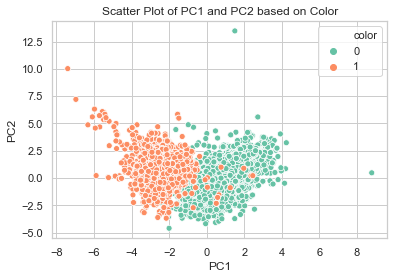

In [37]:
## Scatter Plot of first two components of PCA Projected Data with Color
sns.scatterplot(data=PC1_PC2_Color_df, x='PC1', y='PC2', hue='color', palette='Set2')
plt.title('Scatter Plot of PC1 and PC2 based on Color')
plt.show()

#### PC1 vs PC2 Analysis (On the basis of Color and Quality):

PCA makes sure that the resultant data have no coorelation between the features i .e it provides guarantee that output features will be linearly independent. As per figure (Scatter plot of PC1 and PC2 based on color), both the classes are **almost linearly distinguishable** using first two components of PCA however there exists some outliers which might affect the performance of the classifier.

--------------------------------------------------------------------------------------------------------------------------

### 7.  LDA Analysis with only 2 LDA Component Projected Data

In [34]:
## LDA on Whole Dataset
LDA_classifier = LinearDiscriminantAnalysis(n_components=2)
LD1_LD2_Data = LDA_classifier.fit_transform(Norm_Data_df, Class_df)       ## Clarified by Piazza post 176
LD1_LD2_df = pd.DataFrame(LD1_LD2_Data, columns=['LD1', 'LD2'])
print('LDA Transformed Dataset:\n', LD1_LD2_Data)
print('\n')

# A) Concatenate with Quality

LD1_LD2_Quality_df = pd.concat([LD1_LD2_df.reset_index(drop=True), Class_df.reset_index(drop=True)], axis=1)
print('LDA Transformed Dataset with Quality:\n', LD1_LD2_Quality_df)
print('\n')

# B) Concatenate with Color

LD1_LD2_Color_df = pd.concat([LD1_LD2_df.reset_index(drop=True), Color_df.reset_index(drop=True)], axis=1)
print('LDA Transformed Dataset with Color:\n', LD1_LD2_Color_df)

LDA Transformed Dataset:
 [[-0.78113895 -1.50853456]
 [-1.37261313 -0.17321714]
 [ 0.19594773  0.57770981]
 ...
 [ 0.22238226 -0.98373778]
 [-0.67262233  0.58174705]
 [ 0.5082017  -1.70892477]]


LDA Transformed Dataset with Quality:
            LD1       LD2  quality
0    -0.781139 -1.508535        6
1    -1.372613 -0.173217        6
2     0.195948  0.577710        6
3    -0.339889 -0.424582        6
4    -0.339889 -0.424582        6
...        ...       ...      ...
6492 -0.585186  0.322741        5
6493  0.484526 -0.475843        6
6494  0.222382 -0.983738        6
6495 -0.672622  0.581747        5
6496  0.508202 -1.708925        6

[6497 rows x 3 columns]


LDA Transformed Dataset with Color:
            LD1       LD2 color
0    -0.781139 -1.508535     0
1    -1.372613 -0.173217     0
2     0.195948  0.577710     0
3    -0.339889 -0.424582     0
4    -0.339889 -0.424582     0
...        ...       ...   ...
6492 -0.585186  0.322741     1
6493  0.484526 -0.475843     1
6494  0.222382

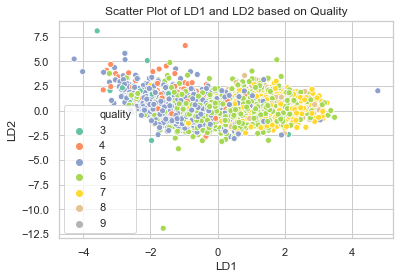

In [35]:
## Scatter Plot of first two components of LDA Projected Data with Quality
sns.set(style='whitegrid', color_codes=True)
sns.scatterplot(data=LD1_LD2_Quality_df, x='LD1', y='LD2', hue='quality', legend='full', palette='Set2')
plt.title('Scatter Plot of LD1 and LD2 based on Quality')
plt.show()

#### LDA shows better class separability as compared to PCA

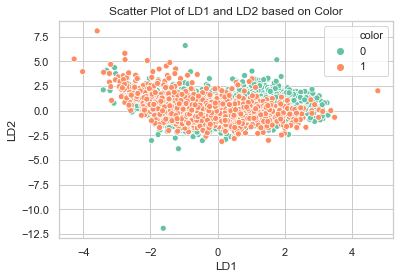

In [36]:
## Scatter Plot of first two components of LDA Projected Data with Color
sns.scatterplot(data=LD1_LD2_Color_df, x='LD1', y='LD2', hue='color', legend='full', palette='Set2')
plt.title('Scatter Plot of LD1 and LD2 based on Color')
plt.show()

#### On the basis of color, LDA performs less accurate than PCA as datapoints of both the classes are overlapped with each other.

## PCA or LDA for KNN Classifier with Uniform, Manhattan and Euclidean Weight Scheme?

**In PCA,**
- Maximum accuracy is obtained for Euclidean Weight Scheme i.e. 99.15%
- Misclassification is lowest for Euclidean Weight Scheme i.e 14

**In LDA,**
- Maximum accuracy is obtained for Uniform Weight Scheme i.e. 99.46%
- Misclassification is lowest for Uniform Weight Scheme i.e 08

***On Comparing, LDA works much better for KNN Classification with Uniform Weight Scheme because it provides maximum accuracy, less misclassification error and better class(Quality) seperability.***

--------------------------------------------------------------------------------------------------------------------------

### 8. Feature Selection:

Technique 1: Using **Heat Map**

In [55]:
## For Feature Selection:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import zscore
import time
from sklearn.preprocessing import MinMaxScaler, RobustScaler


#Reading Red and White Wine Datasets
Red_df = pd.read_csv("Red_Data.csv")
White_df = pd.read_csv("White_Data.csv")
#print(Red_df.head())
#print(White_df.head())

#Adding "Color" Column to both dataframes 
White_df["color"] = "0"
Red_df["color"] = "1"


#Combining Both Dataframe
Wine_df = pd.concat([White_df.reset_index(drop=True), Red_df.reset_index(drop=True)], axis=0)
#print(Wine_df)

#Dividing the data into data and classes
Main_Nocolor_Noclass_df = Wine_df.iloc[:,0:11]                  ##Main data for splitting
Data_withclass_df = Wine_df.iloc[:,0:12]
Class_df = Wine_df.iloc[:,11]
Color_df = Wine_df.iloc[:,12]                  ##Label Data for splitting
#print(Main_Nocolor_Noclass_df)
#print('===============================================================================')
#print(Data_withclass_df)
#print('===============================================================================')
#print(Class_df)
#print('===============================================================================')
#print(Color_df)

# Z Score Normalization on whole dataset
Z_data = zscore(Main_Nocolor_Noclass_df)
#print('Normalized Data:\n', Z_data)

Norm_Data_df = pd.DataFrame(Z_data)
Norm_Data_df.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
#print('===============================================================================')
#print('Normalized Dataframe:\n', Norm_Data_df)


# Normalized Data with color for Pairplot-----------------> Normalized 
Norm_datacolor_df = pd.concat([Norm_Data_df.reset_index(drop=True), Color_df.reset_index(drop=True)], axis = 1)
#print('===============================================================================')
#print(Norm_datacolor_df)

Norm_dataclass_df = pd.concat([Norm_Data_df.reset_index(drop=True), Class_df.reset_index(drop=True)], axis = 1)
#print('===============================================================================')
#print(Norm_dataclass_df)

# Actual Data with color for Pairplot-------------------> Original
Data_with_color_df = pd.concat([Main_Nocolor_Noclass_df.reset_index(drop=True), Color_df.reset_index(drop=True)], axis=1)
#print(Data_with_color_df)

##Train_Test Split
Train_data, Test_data, Train_value, Test_value = train_test_split(Norm_Data_df, np.ravel(Color_df), test_size=0.2, random_state=42)
#print(Train_data)
#print(Test_data)

## Feature Selction
X = Main_Nocolor_Noclass_df.iloc[:,0:784]
Y = Data_withclass_df.iloc[:,-1]
print(X)
print('\n')
print(Y)

C_mat = Data_withclass_df.corr()
C_features = C_mat.index

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

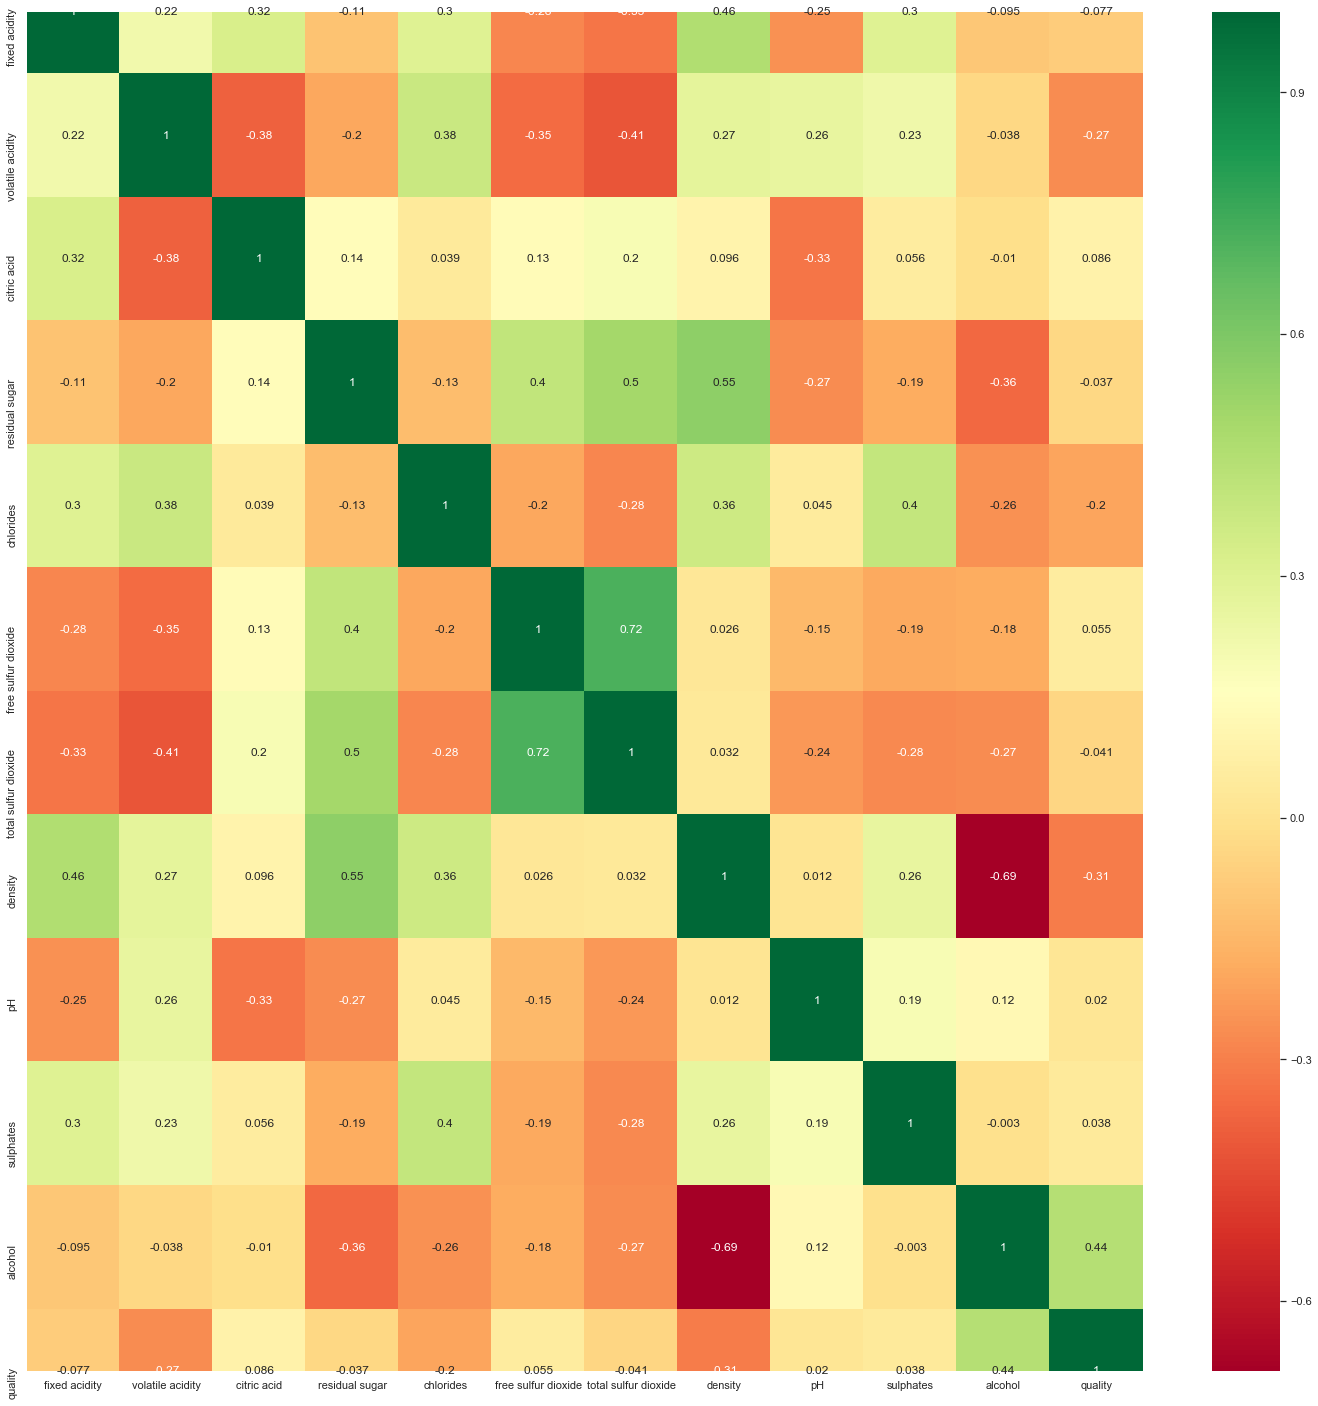

In [57]:
#plot heat map
plt.figure(figsize=(25,25))
sns.heatmap(Data_withclass_df[C_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

#### Usage of HeatMap for 4 best feature selection:

Took into account 4 highest accuracies (except 1) for each row and column. **(Hit and Trial Method)**

*(Tested each combination however code of best subset of data features is provided only.)*

-----------------------------------------------------------------------------------------------------------------------------

Technique 2: Using **Sequential Feature Selector**

In [43]:
##KNN Classifier with Sequential Selector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
KNN = KNeighborsClassifier(n_neighbors=50, n_jobs=-1)
selector = sfs(KNN, k_features=4, forward=True, floating=False, verbose=2, scoring='accuracy', cv=0)
selector = selector.fit(Train_data, Train_value)
print(selector)
print(selector.subsets_)
Main_features = list(selector.k_feature_idx_)
print(Main_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.6s finished

[2020-03-04 21:01:01] Features: 1/4 -- score: 0.928227823744468[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished

[2020-03-04 21:01:03] Features: 2/4 -- score: 0.9724841254569945[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.0s finished

[2020-03-04 21:01:06] Features: 3/4 -- score: 0.9834519915335771[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=KNeighborsClassifier(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=-1,
                                                         n_neighbors=50, p=2,
                                                         weights='uniform'),
                          floating=False, forward=True, k_features=4, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=2)
{1: {'feature_idx': (6,), 'cv_scores': array([0.92822782]), 'avg_score': 0.928227823744468, 'feature_names': ('total sulfur dioxide',)}, 2: {'feature_idx': (4, 6), 'cv_scores': array([0.97248413]), 'avg_score': 0.9724841254569945, 'fea

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.9s finished

[2020-03-04 21:01:07] Features: 4/4 -- score: 0.9874927842986339

#### Now Next Step is:
**Used: 'feature_names': ('residual sugar', 'chlorides', 'total sulfur dioxide', 'density')**  and calculated accuracy of KNN Classifier for all 3 schemes.

In [42]:
## Taking 4 features names separately
A = Wine_df['residual sugar']
B = Wine_df['chlorides']
C = Wine_df['total sulfur dioxide']
D = Wine_df['density']

##Combining these 4 features in a dataframe
Feature_df = pd.concat([A, B, C ,D], axis =1)
print('Subfeature Dataframe:\n', Feature_df)
print('\n')

##Normalizing the 4 feature Dataframe
Z_data = zscore(Feature_df)
Norm_data = pd.DataFrame(Z_data)
Norm_data.columns=['residual sugar', 'chlorides','total sulfur dioxide','density']
print('Normalized data of 4 sub-features:\n', Norm_data)

##Spitting 4 sub feature Normalized data into Train and Test 
Sub_Train_data, Sub_Test_data, Sub_Train_value, Sub_Test_value = train_test_split(Norm_data, np.ravel(Color_df), test_size=0.2, random_state=42)

## KNN Implementation for Uniform Weight
K_values=list(range(1,51))
K_df = pd.DataFrame(K_values, columns=['K_value'])
#print(K_df)

print('FOR UNIFORM WEIGHTS:\n')
Start1_Uniform = time.time()
Accuracy_1=[]
for i in K_values:
    Classifier1 = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    Classifier1.fit(Sub_Train_data, Sub_Train_value)
    C1_pred = Classifier1.predict(Sub_Test_data)
    Accuracy1 = accuracy_score(Sub_Test_value, C1_pred)
    Accuracy_1.append(Accuracy1)

End1_Uniform = (time.time() - Start1_Uniform)
print('Time for Uniform Weights: ', End1_Uniform)
cm_uni = confusion_matrix(Sub_Test_value, C1_pred)
print('Uniform Confusion Matrix:\n', cm_uni)
print('\n')
print('Accuracy List with Uniform Weights:\n', Accuracy_1)
print('\n\n')
Acc1_df = pd.DataFrame(Accuracy_1, columns=['Accuracy'])
K_Acc1_df = pd.concat([K_df.reset_index(drop=True), Acc1_df.reset_index(drop=True)], axis=1)
print(K_Acc1_df)
print('===============================================================================')

K_Acc1_df = K_Acc1_df.set_index('K_value') 
K_Acc1_df = K_Acc1_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Uniform Weights\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acc1_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## KNN Implementation for Manhattan Distance
print('FOR MANHATTAN:\n')
Start1_Man = time.time()
Accuracy_2=[]
for j in K_values:
    Classifier2 = KNeighborsClassifier(n_neighbors=j, weights='distance', p=1, metric='manhattan')
    Classifier2.fit(Sub_Train_data, Sub_Train_value)
    C2_pred = Classifier2.predict(Sub_Test_data)
    Accuracy2 = accuracy_score(Sub_Test_value, C2_pred)
    Accuracy_2.append(Accuracy2)

End1_Man = (time.time() - Start1_Man)
print('Time for Manhattan Distance: ', End1_Man)
cm_man = confusion_matrix(Sub_Test_value, C2_pred)
print('Manhattan Confusion Matrix:\n', cm_man)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_2)
print('\n\n')
Acc2_df = pd.DataFrame(Accuracy_2, columns=['Accuracy'])
K_Acc2_df = pd.concat([K_df.reset_index(drop=True), Acc2_df.reset_index(drop=True)], axis=1)
print(K_Acc2_df)
print('===============================================================================')

K_Acc2_df = K_Acc2_df.set_index('K_value')
K_Acc2_df = K_Acc2_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Manhattan Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acc2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


## KNN Implementation for Euclidean Distance
print('FOR EUCLIDEAN:\n')
Start1_Euc = time.time()
Accuracy_3=[]
for k in K_values:
    Classifier3 = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2, metric='euclidean')
    Classifier3.fit(Sub_Train_data, Sub_Train_value)
    C3_pred = Classifier3.predict(Sub_Test_data)
    Accuracy3 = accuracy_score(Sub_Test_value, C3_pred)
    Accuracy_3.append(Accuracy3)

End1_Euc = (time.time() - Start1_Euc)
print('Time for Euclidean Weights: ', End1_Euc)
cm_euc = confusion_matrix(Sub_Test_value, C3_pred)
print('Euclidean Confusion Matrix:\n', cm_euc)
print('\n')
print('Accuracy List for Euclidean:\n', Accuracy_3)
print('\n\n')
Acc3_df = pd.DataFrame(Accuracy_3, columns=['Accuracy'])
K_Acc3_df = pd.concat([K_df.reset_index(drop=True), Acc3_df.reset_index(drop=True)], axis=1)
print(K_Acc3_df)
print('===============================================================================')

K_Acc3_df = K_Acc3_df.set_index('K_value')
K_Acc3_df = K_Acc3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acc3_df.head(5))
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Subfeature Dataframe:
       volatile acidity  chlorides  total sulfur dioxide  sulphates
0                0.270      0.045                 170.0       0.45
1                0.300      0.049                 132.0       0.49
2                0.280      0.050                  97.0       0.44
3                0.230      0.058                 186.0       0.40
4                0.230      0.058                 186.0       0.40
...                ...        ...                   ...        ...
1594             0.600      0.090                  44.0       0.58
1595             0.550      0.062                  51.0       0.76
1596             0.510      0.076                  40.0       0.75
1597             0.645      0.075                  44.0       0.71
1598             0.310      0.067                  42.0       0.66

[6497 rows x 4 columns]


Normalized data of 4 sub-features:
       residual sugar  chlorides  total sulfur dioxide   density
0          -0.423183  -0.314975              0

#### According to me, **Best subset of data features are: ('residual sugar', 'chlorides', 'total sulfur dioxide', 'density')** because of following reasons:

*Reason 1: From Accuracy Point of view, we are getting approximately same accuracy with 4 selected subfeatures as with 11 label data.*

1) With Uniform Weight Scheme, **Full 11 label data has accuracy of 99.46%** whereas **with 4 subfeature it is providing 99.30% accuracy (slightly less)**.

2) With Manhattan Weight Scheme, **Full 11 label data has accuracy of 99.69%** whereas **with 4 subfeature it is providing 99.61% accuracy (approximately equal)**.

3) With Euclidean Weight Scheme, **Full 11 label data has accuracy of 99.53% and with 4 subfeature it is providing same accuracy**.

-------------------------------------------------------------------------------------------------------------------------------

*Reason 2: From Misclassification Error Point of view, we are getting much better results with 4 subfeature subset than original 11 label data.*

1) In Uniform Weight Scheme, following are the count of misclassification:
- Full 11 label Data: 14
- 4 Feature Subset: 13 (less)

2) In Manhattan Weight Scheme, following are the count of misclassification:
- Full 11 label Data: 08
- 4 Feature Subset: 07 (less)

3) In Euclidean Weight Scheme, following are the count of misclassification:
- Full 11 label Data: 13
- 4 Feature Subset: 08 (less)

-------------------------------------------------------------------------------------------------------------------------------

*{One Obvious difference is time taken, since ony 4 features are taken into account classifier with 4 sub-features would perform classification at much faster rate}*


#### PFB Performance Analysis for 4 features subset on PCA and LDA:

### 9.  PCA with 4 feature subset:

In [40]:
#Fit Training data on PCA snd transform the Test data
print('AFTER PERFORMING PCA ON TEST DATA AND TRANSFORM TEST DATA')
est_pca = PCA(random_state=42)
PCA_Sub_Train_data = est_pca.fit_transform(Sub_Train_data)
PCA_Sub_Test_data = est_pca.transform(Sub_Test_data)
print('PCA Tranformed Training Data:\n', PCA_Sub_Train_data)
print('\n')
print('PCA Tranformed Testing Data:\n', PCA_Sub_Test_data)
print('===============================================================================')


## 1) for Uniform Weight

# K_values=list(range(1,50))
# K_df = pd.DataFrame(K_values, columns=['K_value'])
print('AFTER PCA\nFOR UNIFORM WEIGHTS:\n')
Start2_Uniform = time.time()
Accuracy_test1=[]    
for m in K_values:
    Classifier1_test = KNeighborsClassifier(n_neighbors=m, weights='uniform')
    Classifier1_test.fit(PCA_Sub_Train_data, Sub_Train_value)
    C1test_pred = Classifier1_test.predict(PCA_Sub_Test_data)
    testAccuracy1 = accuracy_score(Sub_Test_value, C1test_pred)
    Accuracy_test1.append(testAccuracy1*100)

End2_Uniform = (time.time() - Start2_Uniform)
print('Time for Uniform Weights: ', End2_Uniform)
cm4 = confusion_matrix(Sub_Test_value, C1test_pred)
print('Confusion Matrix:\n', cm4)
print('\n')
print('Accuracy List with Uniform Weights:\n', Accuracy_test1)
print('\n\n')
Acc_test1_df = pd.DataFrame(Accuracy_test1, columns=['Accuracy'])
K_Acctest1_df = pd.concat([K_df.reset_index(drop=True), Acc_test1_df.reset_index(drop=True)], axis=1)
print(K_Acctest1_df)
print('===============================================================================')

K_Acctest1_df = K_Acctest1_df.set_index('K_value')
K_Acctest1_df = K_Acctest1_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Uniform Weights\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest1_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## 2) for Manhattan Distance
print('AFTER PCA\nFOR MANHATTAN:\n')
Start2_Man = time.time()
Accuracy_test2=[]
for n in K_values:
    Classifier2_test = KNeighborsClassifier(n_neighbors=n, weights='distance', p=1, metric='manhattan')
    Classifier2_test.fit(PCA_Sub_Train_data, Sub_Train_value)
    C2test_pred = Classifier2_test.predict(PCA_Sub_Test_data)
    testAccuracy2 = accuracy_score(Sub_Test_value, C2test_pred)
    Accuracy_test2.append(testAccuracy2*100)

End2_Man = (time.time() - Start2_Man)
print('Time for Manhattan Weights: ', End2_Man)
cm5 = confusion_matrix(Sub_Test_value, C2test_pred)
print('Confusion Matrix:\n', cm5)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_test2)
print('\n\n')
Acc_test2_df = pd.DataFrame(Accuracy_test2, columns=['Accuracy'])
K_Acctest2_df = pd.concat([K_df.reset_index(drop=True), Acc_test2_df.reset_index(drop=True)], axis=1)
print(K_Acctest2_df)
print('===============================================================================')

K_Acctest2_df = K_Acctest2_df.set_index('K_value')
K_Acctest2_df = K_Acctest2_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Manhattan Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


## 3) for Euclidean Distance
print('AFTER PCA\nFOR EUCLIDEAN:\n')
Start2_Euc = time.time() 
Accuracy_test3=[]
for b in K_values:
    Classifier3_test = KNeighborsClassifier(n_neighbors=b, weights='distance', p=2, metric='euclidean')
    Classifier3_test.fit(PCA_Sub_Train_data, Sub_Train_value)
    C3test_pred = Classifier3_test.predict(PCA_Sub_Test_data)
    testAccuracy3 = accuracy_score(Test_value, C3test_pred)
    Accuracy_test3.append(testAccuracy3*100)

End2_Euc =(time.time() - Start2_Euc)
print('Time for Euclidean Weights: ', End2_Euc)
cm6 = confusion_matrix(Sub_Test_value, C3test_pred)
print('Confusion Matrix:\n', cm6)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_test3)
print('\n\n')
Acc_test3_df = pd.DataFrame(Accuracy_test3, columns=['Accuracy'])
K_Acctest3_df = pd.concat([K_df.reset_index(drop=True), Acc_test3_df.reset_index(drop=True)], axis=1)
print(K_Acctest3_df)
print('===============================================================================')

K_Acctest3_df = K_Acctest3_df.set_index('K_value')
K_Acctest3_df = K_Acctest3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest3_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


AFTER PERFORMING PCA ON TEST DATA AND TRANSFORM TEST DATA
PCA Tranformed Training Data:
 [[ 1.16948055 -0.53287153  0.33781564 -0.28121745]
 [-0.45668818 -0.8007071   0.35110949 -0.61143011]
 [-1.21888964  0.87471946  1.44660644  0.58189189]
 ...
 [-0.38516234  2.30350226 -1.00683611 -0.78124427]
 [-1.14485805  0.69284176 -1.02196786 -0.01924577]
 [-0.97347017 -0.80498169 -0.25932791 -0.24645462]]


PCA Tranformed Testing Data:
 [[-1.09855324 -0.98244114  0.34101513  0.27114681]
 [-1.16533921 -0.78219268  0.01638089  0.01615555]
 [ 1.08680819 -0.18649096 -0.76888587  0.34260967]
 ...
 [-1.22283254  6.56678956  4.5441023   1.78706899]
 [-0.80668115  1.51219682 -0.32475129 -0.12377995]
 [-0.79570448  1.54193605 -0.8944708  -0.48306809]]
AFTER PCA
FOR UNIFORM WEIGHTS:

Time for Uniform Weights:  2.2210617065429688
Confusion Matrix:
 [[983   3]
 [ 10 304]]


Accuracy List with Uniform Weights:
 [99.07692307692308, 98.92307692307692, 98.92307692307692, 99.15384615384616, 99.3076923076923, 9

#### Analysis for PCA with 4 features Subset :

1) Uniform Scheme:
- Maximum Accuracy: 99.30%
- Misclassification: 13

2) Manhattan Scheme:
- Maximum Accuracy: 99.53%
- Misclassification: 11

3) Euclidean Scheme:
- Maximum Accuracy: 99.53%
- Misclassification: 09

**Euclidean Scheme is considered as best scheme here as it has achieved maximum accuracy and minimum musclassification**

*P.S -(Same case as with 11 features)*

### 10. LDA with 4 feature Subset:

In [41]:
# Fit Training data on LDA snd transform the Test data

print('AFTER PERFORMING LDA ON TEST DATA AND TRANSFORM TEST DATA')
est_lda = LinearDiscriminantAnalysis()
LDA_Sub_Train_data = est_lda.fit_transform(Sub_Train_data, Sub_Train_value)
LDA_Sub_Test_data = est_lda.transform(Sub_Test_data)
print('LDA Transformed Training Data:\n', LDA_Sub_Train_data)
print('LDA Transformed Testing Data:\n', LDA_Sub_Test_data)
print('===============================================================================')

## 1) for Uniform Weight
# K_values=list(range(1,50))
# K_df = pd.DataFrame(K_values, columns=['K_value'])
Start3_Uniform = time.time()
LDA_Accuracy_test1=[]    
for q in K_values:
    LDA_Classifier1_test = KNeighborsClassifier(n_neighbors=q, weights='uniform')
    LDA_Classifier1_test.fit(LDA_Sub_Train_data, Sub_Train_value)
    LDA_C1test_pred = LDA_Classifier1_test.predict(LDA_Sub_Test_data)
    LDA_testAccuracy1 = accuracy_score(Sub_Test_value, LDA_C1test_pred)
    LDA_Accuracy_test1.append(LDA_testAccuracy1*100)

End3_Uniform  = time.time() - Start3_Uniform
print('Time for Uniform Weights: ', End3_Uniform)
cm7 = confusion_matrix(Sub_Test_value, LDA_C1test_pred)
print('Confusion Matrix:\n', cm7)
print('\n')
print('Accuracy List with Uniform Weights:\n', LDA_Accuracy_test1)
print('\n\n')
LDA_Acc_test1_df = pd.DataFrame(LDA_Accuracy_test1, columns=['Accuracy'])
LDA_K_Acctest1_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test1_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest1_df)
print('===============================================================================')

LDA_K_Acctest1_df = LDA_K_Acctest1_df.set_index('K_value')
LDA_K_Acctest1_df = LDA_K_Acctest1_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Uniform Weights\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest1_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## 2) for Manhattan Distance
print('AFTER LDA\nFOR MANHATTAN:\n')
Start3_Man = time.time()
LDA_Accuracy_test2=[]
for w in K_values:
    LDA_Classifier2_test = KNeighborsClassifier(n_neighbors=w, weights='distance', p=1, metric='manhattan')
    LDA_Classifier2_test.fit(LDA_Sub_Train_data, Sub_Train_value)
    LDA_C2test_pred = LDA_Classifier2_test.predict(LDA_Sub_Test_data)
    LDA_testAccuracy2 = accuracy_score(Sub_Test_value, LDA_C2test_pred)
    LDA_Accuracy_test2.append(LDA_testAccuracy2*100)

End3_Man = (time.time() - Start3_Man)
print('Time for Manhattan Weights: ', End3_Man)
cm8 = confusion_matrix(Sub_Test_value, LDA_C2test_pred)
print('Confusion Matrix:\n', cm8)
print('\n')
print('Accuracy List for Manhattan:\n', LDA_Accuracy_test2)
print('\n\n')
LDA_Acc_test2_df = pd.DataFrame(LDA_Accuracy_test2, columns=['Accuracy'])
LDA_K_Acctest2_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test2_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest2_df)
print('===============================================================================')

LDA_K_Acctest2_df = LDA_K_Acctest2_df.set_index('K_value')
LDA_K_Acctest2_df = LDA_K_Acctest2_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Manhattan Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## 3) for Euclidean Distance
print('AFTER LDA\nFOR EUCLIDEAN:\n')
Start3_Euc = time.time()
LDA_Accuracy_test3=[]
for e in K_values:
    LDA_Classifier3_test = KNeighborsClassifier(n_neighbors=e, weights='distance', p=2, metric='euclidean')
    LDA_Classifier3_test.fit(LDA_Sub_Train_data, Sub_Train_value)
    LDA_C3test_pred = LDA_Classifier3_test.predict(LDA_Sub_Test_data)
    LDA_testAccuracy3 = accuracy_score(Sub_Test_value, LDA_C3test_pred)
    LDA_Accuracy_test3.append(LDA_testAccuracy3*100)

End3_Euc = (time.time() - Start3_Euc)
print('Time for Euclidean Weights: ', End3_Euc)
cm9 = confusion_matrix(Sub_Test_value, LDA_C3test_pred)
print('Confusion Matrix:\n', cm9)
print('\n')
print('Accuracy List for Euclidean:\n', LDA_Accuracy_test3)
print('\n\n')
LDA_Acc_test3_df = pd.DataFrame(LDA_Accuracy_test3, columns=['Accuracy'])
LDA_K_Acctest3_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test3_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest3_df)
print('===============================================================================')

LDA_K_Acctest3_df = LDA_K_Acctest3_df.set_index('K_value')
LDA_K_Acctest3_df = LDA_K_Acctest3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest3_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

AFTER PERFORMING LDA ON TEST DATA AND TRANSFORM TEST DATA
LDA Transformed Training Data:
 [[-1.43992459]
 [-0.50854195]
 [ 0.27041429]
 ...
 [ 5.38869861]
 [ 2.53833529]
 [-0.15731185]]
LDA Transformed Testing Data:
 [[-1.40732193]
 [-0.52201093]
 [-0.73189534]
 ...
 [ 5.12880634]
 [ 3.16209378]
 [ 4.05099786]]
Time for Uniform Weights:  1.7592964172363281
Confusion Matrix:
 [[979   7]
 [ 19 295]]


Accuracy List with Uniform Weights:
 [98.0, 97.53846153846155, 97.92307692307692, 98.15384615384616, 98.15384615384616, 98.0, 97.84615384615385, 97.84615384615385, 98.07692307692307, 98.0, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 97.92307692307692, 98.0, 98.0, 98.0, 98.0, 98.07692307692307, 98.0, 97.92307692307692, 98.0, 97.92307692307692, 98.0, 97.92307692307692, 97.92307692307692, 97.92307692307692, 98.07

#### Performance Analysis for LDA with 4 features Subset :

1) Uniform Scheme:
- Maximum Accuracy: 98.15%
- Misclassification: 26

2) Manhattan Scheme:
- Maximum Accuracy: 98.30%
- Misclassification: 23

3) Euclidean Scheme:
- Maximum Accuracy: 98.30%
- Misclassification: 23

### 11. Effect of Normalization and Un-Normalized Data with  PCA:

In [55]:
#******************************************************On Un-Normalized Data***************************************************

#Fit Training data on PCA snd transform the Test data
print('AFTER PERFORMING PCA ON TEST DATA AND TRANSFORM TEST DATA')
est_pca = PCA(random_state=42)
PCA_Train_data = est_pca.fit_transform(Or_Train_data)
PCA_Test_data = est_pca.transform(Or_Test_data)
print('PCA Tranformed Training Data:\n', PCA_Train_data)
print('\n')
print('PCA Tranformed Testing Data:\n', PCA_Test_data)
print('===============================================================================')

## 1) for Uniform Weight

# K_values=list(range(1,50))
# K_df = pd.DataFrame(K_values, columns=['K_value'])
print('AFTER PCA\nFOR UNIFORM WEIGHTS:\n')
Start2_Uniform = time.time()
Accuracy_test1=[]    
for m in K_values:
    Classifier1_test = KNeighborsClassifier(n_neighbors=m, weights='uniform')
    Classifier1_test.fit(PCA_Train_data, Or_Train_value)
    C1test_pred = Classifier1_test.predict(PCA_Test_data)
    testAccuracy1 = accuracy_score(Or_Test_value, C1test_pred)
    Accuracy_test1.append(testAccuracy1*100)

End2_Uniform = (time.time() - Start2_Uniform)
print('Time for Uniform Weights: ', End2_Uniform)
cm4 = confusion_matrix(Or_Test_value, C1test_pred)
print('Confusion Matrix:\n', cm4)
print('\n')
print('Accuracy List with Uniform Weights:\n', Accuracy_test1)
print('\n\n')
Acc_test1_df = pd.DataFrame(Accuracy_test1, columns=['Accuracy'])
K_Acctest1_df = pd.concat([K_df.reset_index(drop=True), Acc_test1_df.reset_index(drop=True)], axis=1)
print(K_Acctest1_df)
print('===============================================================================')

K_Acctest1_df = K_Acctest1_df.set_index('K_value')
K_Acctest1_df = K_Acctest1_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Uniform Weights\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest1_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## 2) for Manhattan Distance
print('AFTER PCA\nFOR MANHATTAN:\n')
Start2_Man = time.time()
Accuracy_test2=[]
for n in K_values:
    Classifier2_test = KNeighborsClassifier(n_neighbors=n, weights='distance', p=1, metric='manhattan')
    Classifier2_test.fit(PCA_Train_data, Or_Train_value)
    C2test_pred = Classifier2_test.predict(PCA_Test_data)
    testAccuracy2 = accuracy_score(Or_Test_value, C2test_pred)
    Accuracy_test2.append(testAccuracy2*100)

End2_Man = (time.time() - Start2_Man)
print('Time for Manhattan Weights: ', End2_Man)
cm5 = confusion_matrix(Or_Test_value, C2test_pred)
print('Confusion Matrix:\n', cm5)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_test2)
print('\n\n')
Acc_test2_df = pd.DataFrame(Accuracy_test2, columns=['Accuracy'])
K_Acctest2_df = pd.concat([K_df.reset_index(drop=True), Acc_test2_df.reset_index(drop=True)], axis=1)
print(K_Acctest2_df)
print('===============================================================================')

K_Acctest2_df = K_Acctest2_df.set_index('K_value')
K_Acctest2_df = K_Acctest2_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Manhattan Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## 3) for Euclidean Distance
print('AFTER PCA\nFOR EUCLIDEAN:\n')
Start2_Euc = time.time() 
Accuracy_test3=[]
for b in K_values:
    Classifier3_test = KNeighborsClassifier(n_neighbors=b, weights='distance', p=2, metric='euclidean')
    Classifier3_test.fit(PCA_Train_data, Or_Train_value)
    C3test_pred = Classifier3_test.predict(PCA_Test_data)
    testAccuracy3 = accuracy_score(Or_Test_value, C3test_pred)
    Accuracy_test3.append(testAccuracy3*100)

End2_Euc =(time.time() - Start2_Euc)
print('Time for Euclidean Weights: ', End2_Euc)
cm6 = confusion_matrix(Or_Test_value, C3test_pred)
print('Confusion Matrix:\n', cm6)
print('\n')
print('Accuracy List for Manhattan:\n', Accuracy_test3)
print('\n\n')
Acc_test3_df = pd.DataFrame(Accuracy_test3, columns=['Accuracy'])
K_Acctest3_df = pd.concat([K_df.reset_index(drop=True), Acc_test3_df.reset_index(drop=True)], axis=1)
print(K_Acctest3_df)
print('===============================================================================')

K_Acctest3_df = K_Acctest3_df.set_index('K_value')
K_Acctest3_df = K_Acctest3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', K_Acctest3_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

AFTER PERFORMING PCA ON TEST DATA AND TRANSFORM TEST DATA
PCA Tranformed Training Data:
 [[ 6.80987919e+01  7.95986885e+00 -1.76627946e-01 ...  2.35805279e-02
  -6.17639470e-03  7.15423377e-04]
 [ 2.88021895e+01 -1.36661903e+01 -4.74952132e+00 ... -1.00106921e-01
  -8.61188318e-04  6.90429066e-04]
 [-1.08964975e+01  5.07230889e+00 -3.43655815e+00 ...  7.43819590e-02
   6.72746642e-02  1.06210617e-05]
 ...
 [-9.78243181e+01 -1.96497440e+00  1.46563251e+00 ... -4.47377736e-02
  -6.02582988e-03 -1.09888061e-03]
 [-9.03615060e+01  3.48866932e+00  6.85309107e-01 ...  4.96536143e-02
  -1.99800803e-02  1.16055369e-03]
 [-1.07257243e+01  1.01590917e+01 -3.38629642e+00 ... -5.70574328e-02
  -3.33000048e-02 -1.70625460e-03]]


PCA Tranformed Testing Data:
 [[ 4.34157079e+00  8.64562878e+00 -3.53438164e+00 ...  7.46972099e-02
   2.10092627e-03 -3.44988737e-04]
 [-1.32700567e+01 -5.37241408e-01 -3.27158469e+00 ...  2.37020246e-01
  -1.42264260e-02 -2.04108100e-04]
 [ 4.16509957e+00  1.50641856e+01

## Analysis:

**With Unnormalized Data,**

- **KNN Classifier accuracy, fitted  with with PCA Transformed Data on different weights schemes has been reduced to a great extent.**

- **Misclassification count/error has been increased greatly with un-normalized data. PFB.**

------------------------------------------------------------------------------------------------------------------------------

**PCA With Uniform Weight Scheme:**

1) On Normalized Data:
    - Accuracy = 99.46%
    - Misclassification count = 14
2) On Un-Normalized Data:
    - Accuracy = 95%[K=1, Overfitting Case], 93%[K=2]
    - Misclassification count = 99

-------------------------------------------------------------------------------------------------------------------------------

**PCA With Manhattan Weight Scheme:**

1) On Normalized Data:
    - Accuracy = 99.69%
    - Misclassification count = 08
2) On Un-Normalized Data:
    - Accuracy = 96.30%[K=3]
    - Misclassification count = 69
-------------------------------------------------------------------------------------------------------------------------------

**PCA With Euclidean Weight Scheme:**

1) On Normalized Data:
    - Accuracy = 99.53%
    - Misclassification count = 13
2) On Un-Normalized Data:
    - Accuracy = 95.15%[K=4,6]
    - Misclassification count = 77
    

### 12. Effect of Normalization and Un-Normalized Data with  LDA:

In [57]:
#******************************************************On Un-Normalized Data***************************************************

# Fit Training data on LDA snd transform the Test data
print('AFTER PERFORMING LDA ON TEST DATA AND TRANSFORM TEST DATA')
est_lda = LinearDiscriminantAnalysis()
LDA_Train_data = est_lda.fit_transform(Or_Train_data, Or_Train_value)
LDA_Test_data = est_lda.transform(Or_Test_data)
print('LDA Transformed Training Data:\n', LDA_Train_data)
print('LDA Transformed Testing Data:\n', LDA_Test_data)
print('===============================================================================')

## 1) for Uniform Weight
# K_values=list(range(1,50))
# K_df = pd.DataFrame(K_values, columns=['K_value'])
Start3_Uniform = time.time()
LDA_Accuracy_test1=[]    
for q in K_values:
    LDA_Classifier1_test = KNeighborsClassifier(n_neighbors=q, weights='uniform')
    LDA_Classifier1_test.fit(LDA_Train_data, Or_Train_value)
    LDA_C1test_pred = LDA_Classifier1_test.predict(LDA_Test_data)
    LDA_testAccuracy1 = accuracy_score(Or_Test_value, LDA_C1test_pred)
    LDA_Accuracy_test1.append(LDA_testAccuracy1*100)

End3_Uniform  = time.time() - Start3_Uniform
print('Time for Uniform Weights: ', End3_Uniform)
cm7 = confusion_matrix(Or_Test_value, LDA_C1test_pred)
print('Confusion Matrix:\n', cm7)
print('\n')
print('Accuracy List with Uniform Weights:\n', LDA_Accuracy_test1)
print('\n\n')
LDA_Acc_test1_df = pd.DataFrame(LDA_Accuracy_test1, columns=['Accuracy'])
LDA_K_Acctest1_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test1_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest1_df)
print('===============================================================================')

LDA_K_Acctest1_df = LDA_K_Acctest1_df.set_index('K_value')
LDA_K_Acctest1_df = LDA_K_Acctest1_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Uniform Weights\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest1_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## 2) for Manhattan Distance
print('AFTER LDA\nFOR MANHATTAN:\n')
Start3_Man = time.time()
LDA_Accuracy_test2=[]
for w in K_values:
    LDA_Classifier2_test = KNeighborsClassifier(n_neighbors=w, weights='distance', p=1, metric='manhattan')
    LDA_Classifier2_test.fit(LDA_Train_data, Or_Train_value)
    LDA_C2test_pred = LDA_Classifier2_test.predict(LDA_Test_data)
    LDA_testAccuracy2 = accuracy_score(Or_Test_value, LDA_C2test_pred)
    LDA_Accuracy_test2.append(LDA_testAccuracy2*100)

End3_Man = (time.time() - Start3_Man)
print('Time for Manhattan Weights: ', End3_Man)
cm8 = confusion_matrix(Or_Test_value, LDA_C2test_pred)
print('Confusion Matrix:\n', cm8)
print('\n')
print('Accuracy List for Manhattan:\n', LDA_Accuracy_test2)
print('\n\n')
LDA_Acc_test2_df = pd.DataFrame(LDA_Accuracy_test2, columns=['Accuracy'])
LDA_K_Acctest2_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test2_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest2_df)
print('===============================================================================')

LDA_K_Acctest2_df = LDA_K_Acctest2_df.set_index('K_value')
LDA_K_Acctest2_df = LDA_K_Acctest2_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Manhattan Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest2_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

## 3) for Euclidean Distance
print('AFTER LDA\nFOR EUCLIDEAN:\n')
Start3_Euc = time.time()
LDA_Accuracy_test3=[]
for e in K_values:
    LDA_Classifier3_test = KNeighborsClassifier(n_neighbors=e, weights='distance', p=2, metric='euclidean')
    LDA_Classifier3_test.fit(LDA_Train_data, Or_Train_value)
    LDA_C3test_pred = LDA_Classifier3_test.predict(LDA_Test_data)
    LDA_testAccuracy3 = accuracy_score(Or_Test_value, LDA_C3test_pred)
    LDA_Accuracy_test3.append(LDA_testAccuracy3*100)

End3_Euc = (time.time() - Start3_Euc)
print('Time for Euclidean Weights: ', End3_Euc)
cm9 = confusion_matrix(Or_Test_value, LDA_C3test_pred)
print('Confusion Matrix:\n', cm9)
print('\n')
print('Accuracy List for Euclidean:\n', LDA_Accuracy_test3)
print('\n\n')
LDA_Acc_test3_df = pd.DataFrame(LDA_Accuracy_test3, columns=['Accuracy'])
LDA_K_Acctest3_df = pd.concat([K_df.reset_index(drop=True), LDA_Acc_test3_df.reset_index(drop=True)], axis=1)
print(LDA_K_Acctest3_df)
print('===============================================================================')

LDA_K_Acctest3_df = LDA_K_Acctest3_df.set_index('K_value')
LDA_K_Acctest3_df = LDA_K_Acctest3_df.sort_values(by=['Accuracy'], ascending=False)
print('KNearest Classifier with Euclidean Distance\nAfter Sorting, Highest Accuracy is obtained for:\n', LDA_K_Acctest3_df.head(5))
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

AFTER PERFORMING LDA ON TEST DATA AND TRANSFORM TEST DATA
LDA Transformed Training Data:
 [[-1.98107646]
 [-1.88534429]
 [-0.54574636]
 ...
 [ 4.685012  ]
 [ 4.7336336 ]
 [-0.8051647 ]]
LDA Transformed Testing Data:
 [[-1.6286457 ]
 [-2.17666703]
 [-1.93784767]
 ...
 [ 4.92508932]
 [ 4.77368134]
 [ 5.00016157]]
Time for Uniform Weights:  1.710475206375122
Confusion Matrix:
 [[982   4]
 [  4 310]]


Accuracy List with Uniform Weights:
 [99.23076923076923, 99.3076923076923, 99.23076923076923, 99.23076923076923, 99.38461538461539, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.46153846153845, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.46153846153845, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.38461538461539, 99.3846153

#### Interestingly,
**In LDA Normalizing data doesn't have any impact on KNN Classifier with any of the weight schemes** i.e. same accuracy and same misclassification results has been observed with Normalized data and Un-normalized data.

#### ** THE END **